In [3]:
#Install all the Reqiuired Libraries and Packages 
import os
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc , logfbank
import librosa as lr
import pickle
from scipy import signal
import noisereduce as nr
from glob import glob
from tqdm.auto import tqdm
get_ipython().magic('matplotlib inline')
#All the Required Packages and Libraies are installed.
import soundfile
from tensorflow.keras.layers import Conv2D,MaxPool2D, Flatten, LSTM
from keras.layers import Dropout,Dense,TimeDistributed
from keras.models import Sequential
# from keras.utils import to_categorical 
from tensorflow.keras.utils import to_categorical

from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [7]:
#Loading the required RAVDESS DataSet with length of 1439 Audio Files 
import pathlib
BASE_DIR = os.getcwd()
os.listdir(path=f'{BASE_DIR}/speech-emotion-recognition-ravdess-data')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = f'{BASE_DIR}/speech-emotion-recognition-ravdess-data'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)

1439

In [8]:
#Use the Speech-Recognition API to get the Raw Text from Audio Files, Though Speech Recognition
#is less strong for large chunk of files , so used Error Handling , where when it is not be able to 
#produce the text of a particular Audio File it prints the statement 'error'.Just for understanding Audio
import speech_recognition as sr
r=sr.Recognizer()
for file in range(0 , len(listOfFiles) , 1):
    with sr.AudioFile(listOfFiles[file]) as source:
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')

dogs are sitting by the door
sitting by the door
dogs are sitting by the door
dogs are sitting by the door
kids are talking by the door
dogs are sitting by the door
kids are talking by the door
kids are talking by the door
kids are talking by the door
kids are talking by the door
dogs are sitting by the door
dogs are sitting by the door
dogs are sitting by the door
songs are sitting by the door
don't search sitting by the door
still just sitting by the door
dogs are sitting by the door
dogs are sitting by the door
cancer talking by the door
kids are talking by the door
dogs are sitting by the door
kids are talking by the door
dogs are sitting by the door
kids are talking by the door
kids are talking by the door
kids are talking by the door
dogs are sitting by the door
kids are talking by the door
kids are talking by the door
dogs are sitting by the door
walking by the door
kids are talking by the door
kids are talking by the door
kids are talking by the door
dogs are sitting by the doo

dogs are sitting by the door
kids are talking by the door
kids are talking by the door
dogs are sitting by the door
dogs are sitting by the door
dogs are sitting by the door
kids are talking by the door
dogs are sitting by the door
dogs are sitting by the door
kids are talking by the door
kids are talking by the door
dogs are sitting by the door
kids are talking by the door
dogs are sitting by the door
kids are talking by the door
kids are talking by the door
dogs are sitting by the door
get there talking by the door
dogs are sitting by the door
kids are talking by the door
dogs are sitting by the door
kids are talking by the door
dogs are sitting by the door
dogs are sitting by the door
kids are talking by the door
dogs are sitting by the door
dogs are sitting by the door
kids are talking by the door
dogs are sitting by the door
sitting by the door
kids are talking by the door
kids are talking by the door
dogs are sitting by the door
dogs are sitting by the door
dogs are sitting by th

dogs are sitting by the door
kids are talking by the door
kids are talking by the door
dogs are sitting by the door
sugar talking by the door
dogs are sitting by the door
dogs are sitting by the door
Doppler sitting by the door
kids are talking by the door
kids are talking by the door
kids are talking by the door
error
kids are talking by the door
dogs are sitting by the door
dogs are sitting by the door
kids are talking by the door
dogs are sitting by the door
Kipper talking by the door
dogs are sitting by the door
Kinder talking by the door
dogs are sitting by the door
dogs are sitting by the door
Kinder talking by the door
Timber talking about the door
Hitler talking by the door
dog sitting by the door
dogs are sitting by the door
they're talking about the door
dogs are sitting by the door
dogs are sitting by the door
can there talkin by the door
kids are talking by the door
dogs are sitting by the door
dogs are sitting by the door
dogs are sitting by the door
kids are talking by th

kids are talking by the door
kids are talking by the door
dogs are sitting by the door
kids are talking by the door
doctor sitting by the door
kids are talking by the door
kids are talking by the door
error
dogs are sitting by the door
sitting by the door
kids are talking by the door
kids are talking by the door
dogs are sitting by the door
kids are talking by the door
dogs are sitting by the door
kids are talking by the door
dogs are sitting by the door
kids are talking by the door
dogs are sitting by the door
dog sitting by the door
error
kids are talking by the door
kids talking by the door
dogs are sitting by the door
dogs are sitting by the door
dogs are sitting by the door
kids are talking by the door
kids are talking by the door
don't you sitting by the door
kids are talking by the door
dogs are sitting by the door
dogs are sitting by the door
kids are talking by the door
kids are talking by the door
dogs are sitting by the door
kids are talking by the door
dogs are sitting by t

kids are talking by the door
kids are talking by the door
kids are talking by the door
kids are talking by the door
dogs are sitting by the door
dogs are sitting by the door
dogs are sitting by the door
kids are talking by the door
kids are talking by the door
dogs are sitting by the door
error
dogs are sitting by the door
dogs are sitting by the door
kids are talking by the door
dogs are sitting by the door
dogs are sitting by the door
kids are talking by the door
kids are talking by the door
kids are talking by the door
kids are talking by the door
kids are talking by the door
dogs are sitting by the door
kids are talking by the door
kids are talking by the door
talks are sitting by the door
kids are talking by the door
dogs are sitting by the door
kids are talking by the door
kids are talking by the door
dog sitting by the door
dogs are sitting by the door
kids are talking by the door
kids are talking by the door
kids are talking by pidor
kids are talking by the door
dogs are sittin

In [10]:
#Now Cleaning Step is Performed where:
#DOWN SAMPLING OF AUDIO FILES IS DONE  AND PUT MASK OVER IT AND DIRECT INTO CLEAN FOLDER
#MASK IS TO REMOVE UNNECESSARY EMPTY VOIVES AROUND THE MAIN AUDIO VOICE 
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

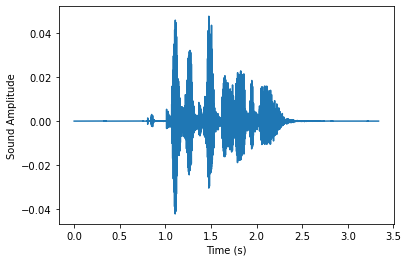

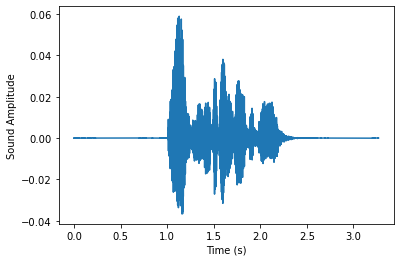

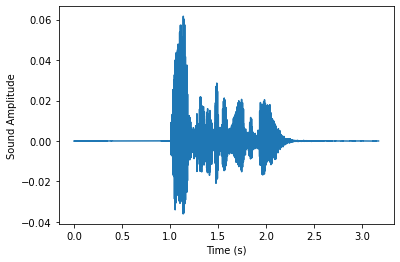

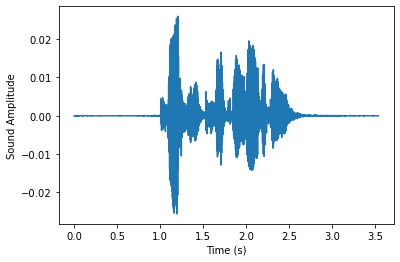

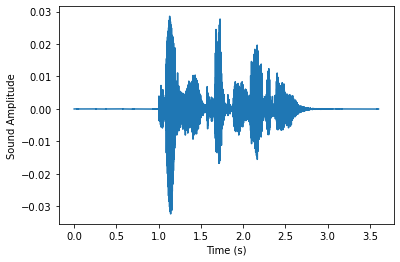

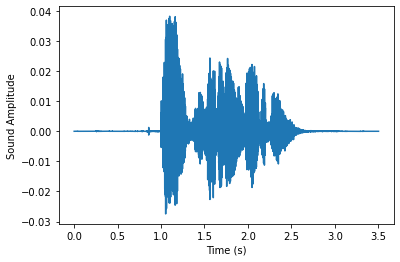

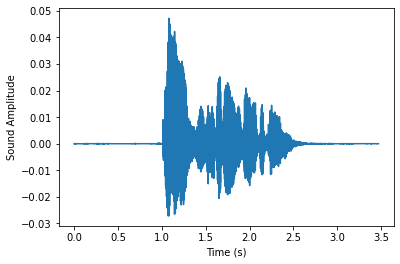

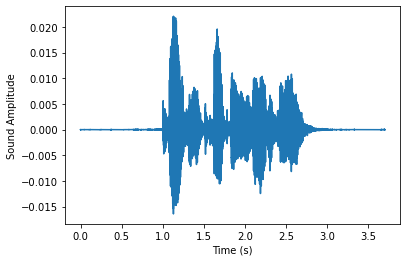

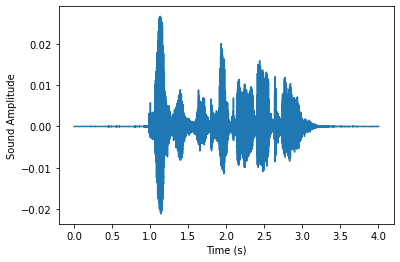

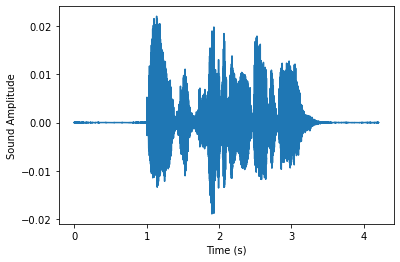

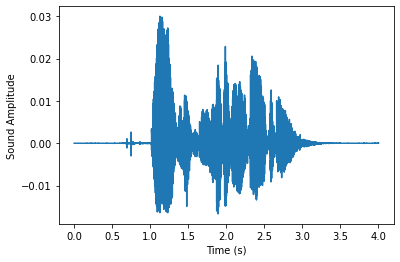

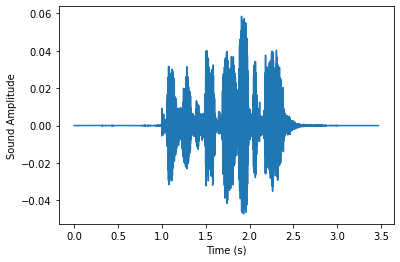

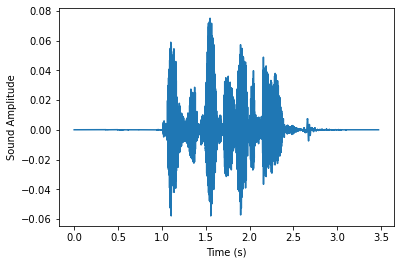

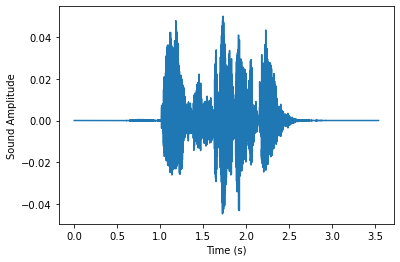

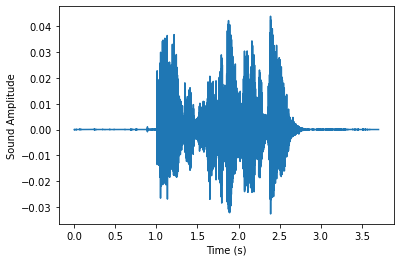

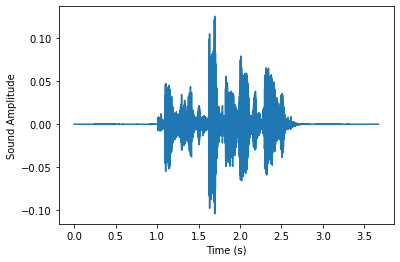

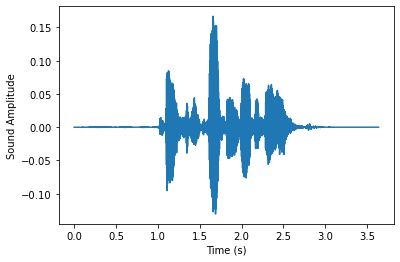

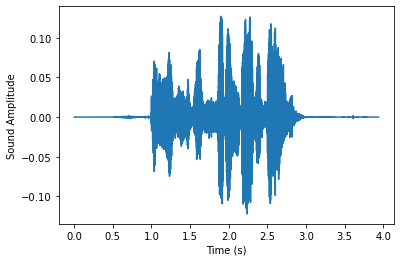

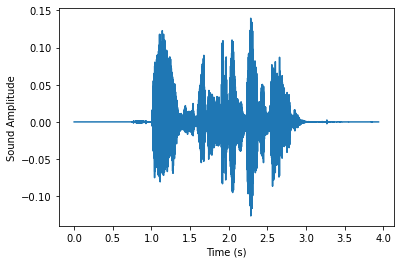

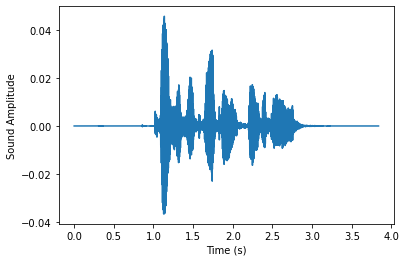

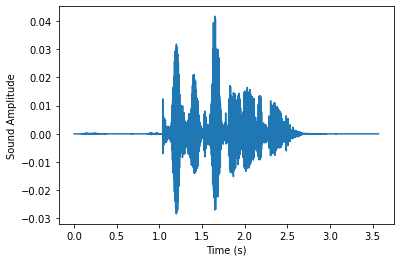

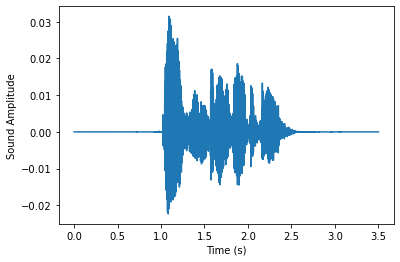

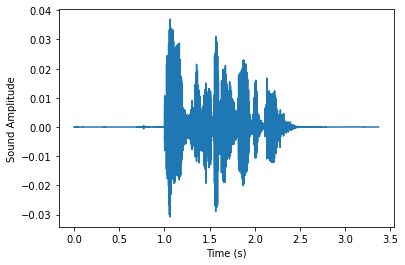

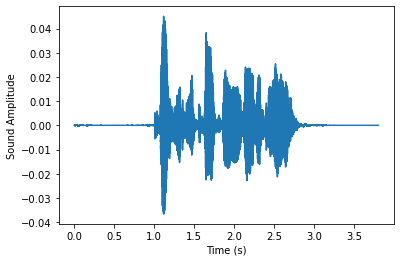

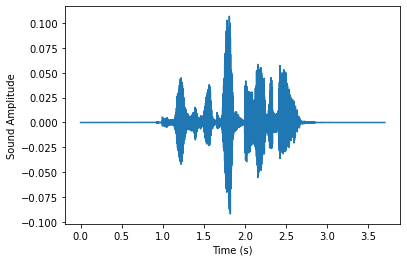

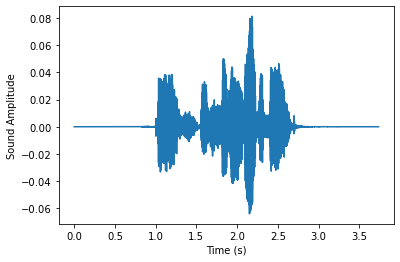

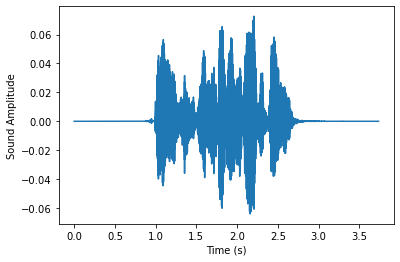

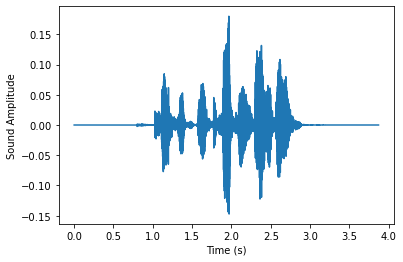

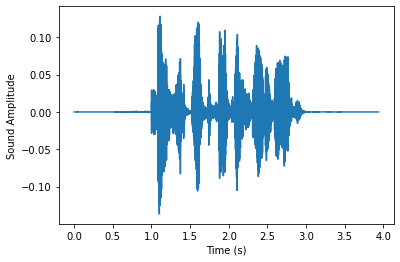

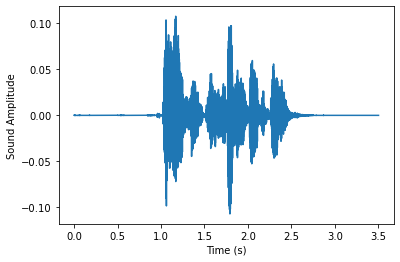

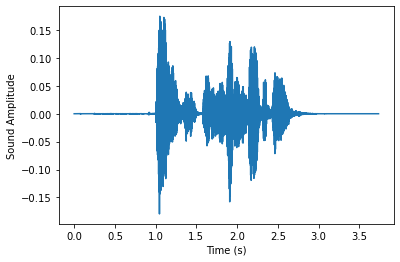

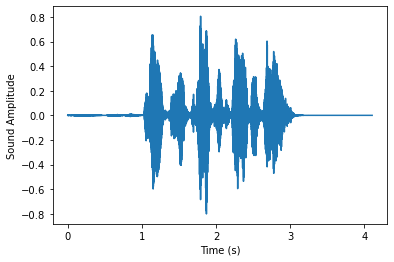

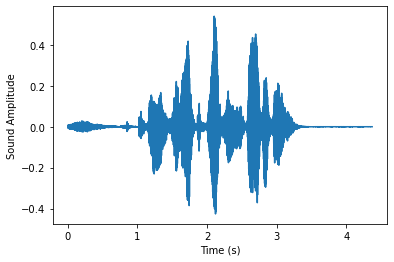

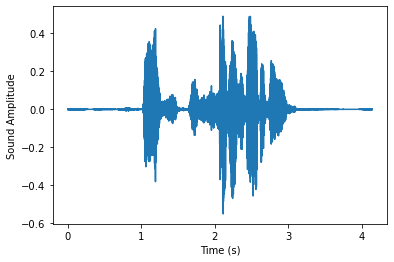

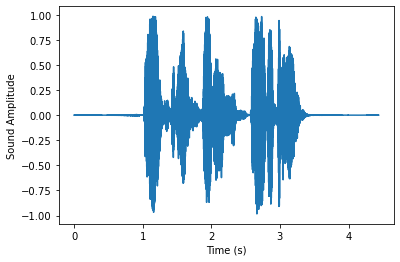

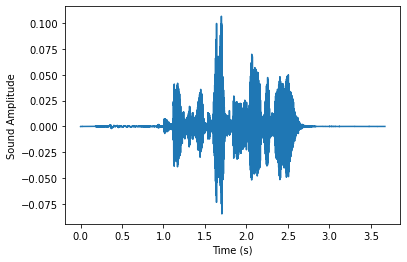

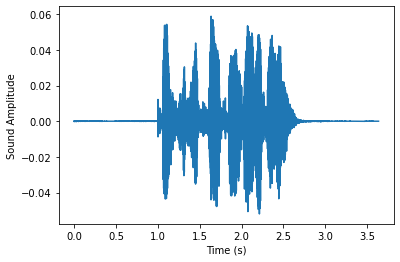

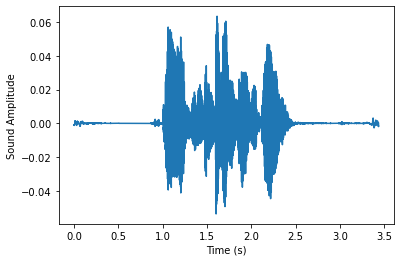

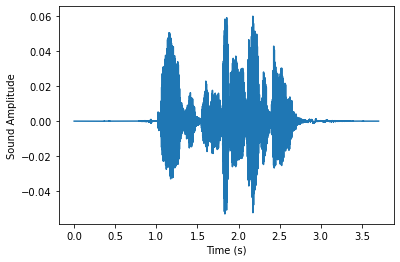

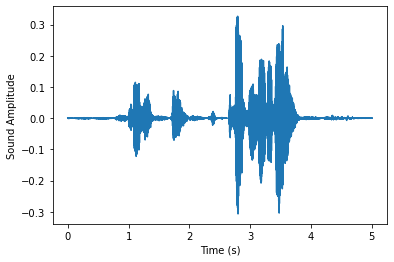

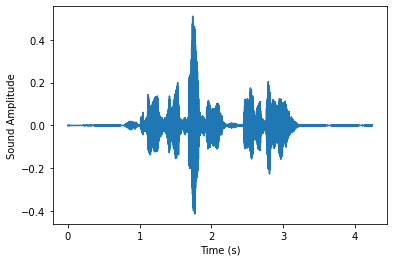

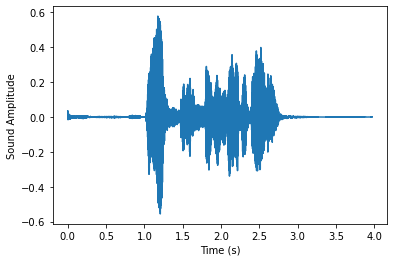

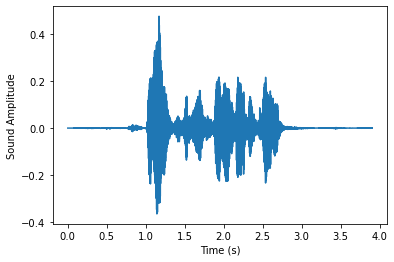

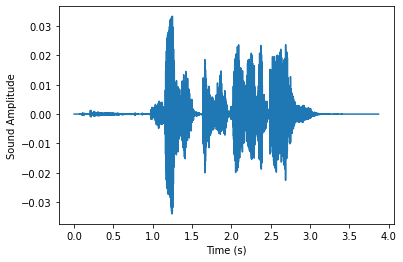

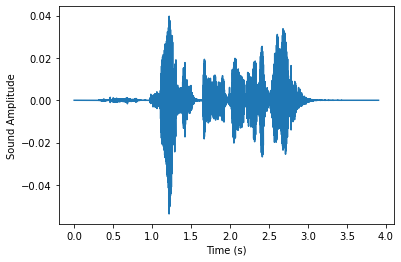

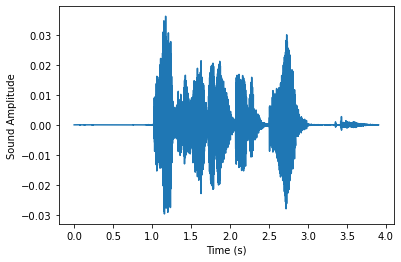

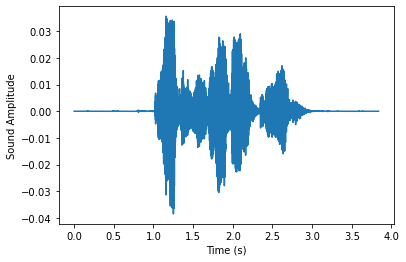

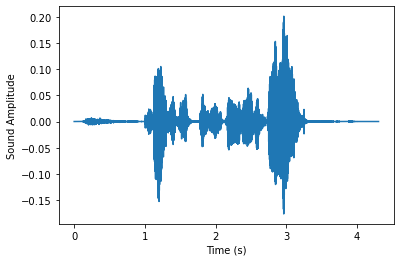

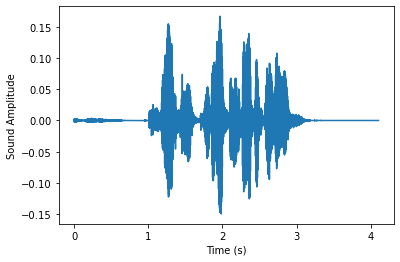

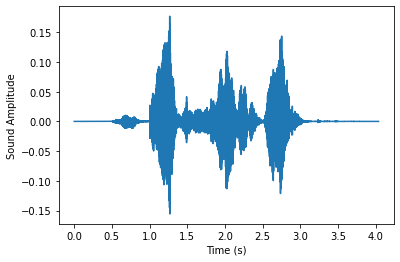

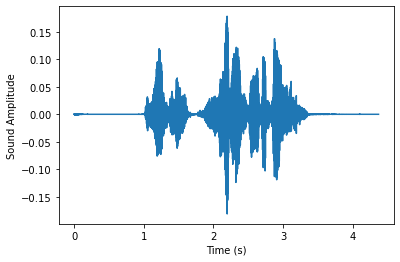

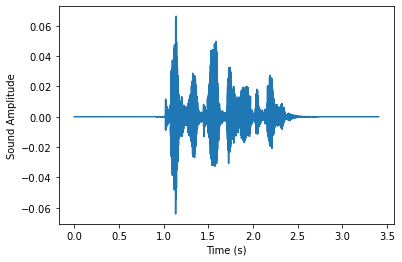

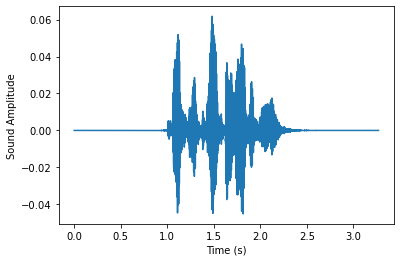

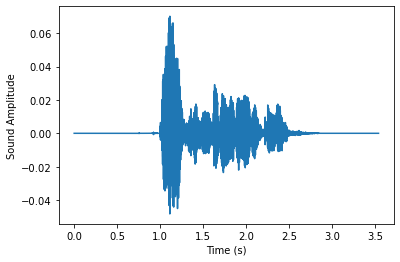

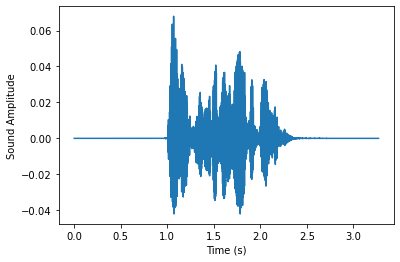

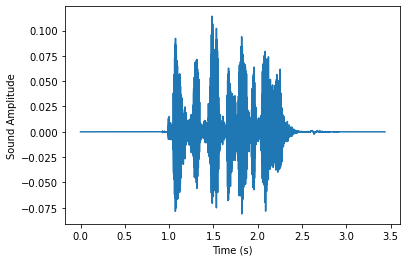

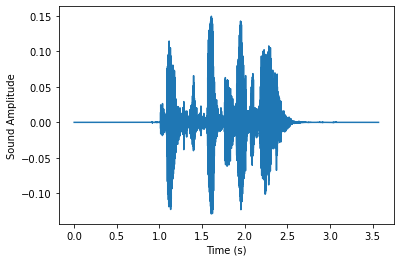

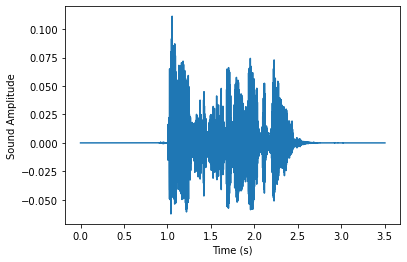

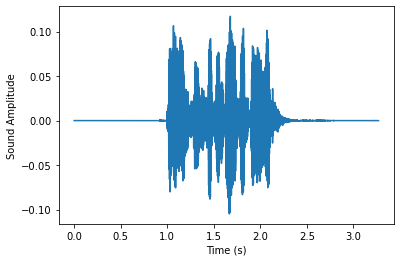

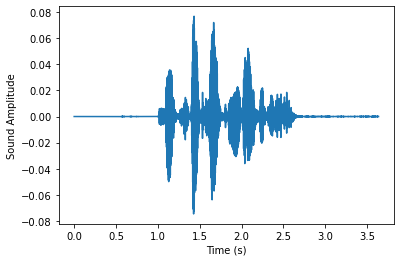

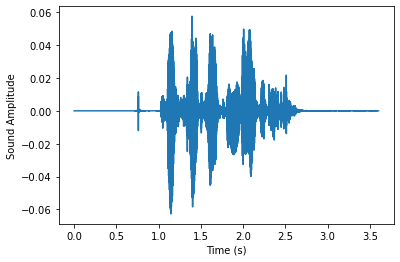

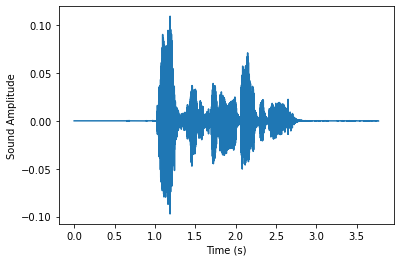

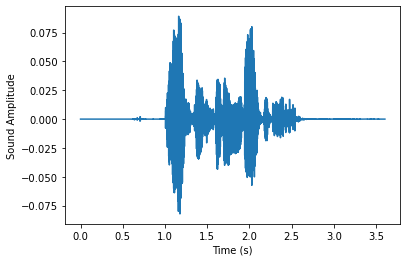

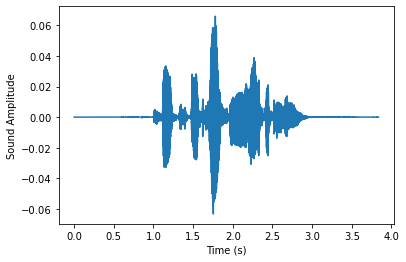

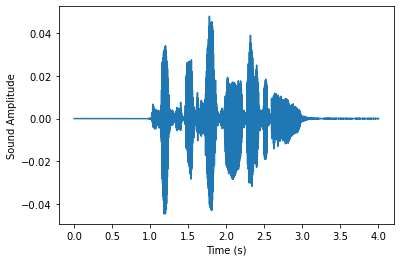

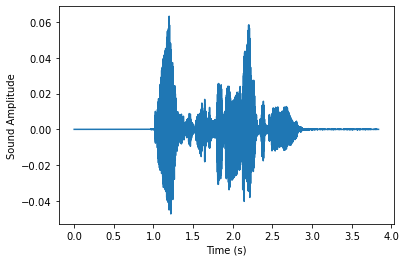

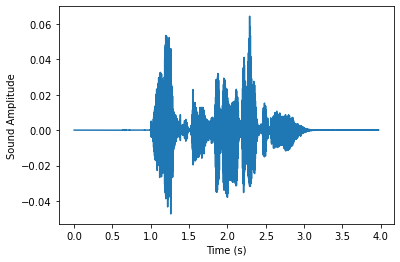

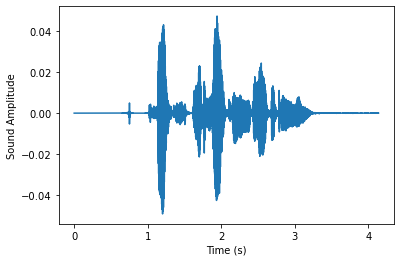

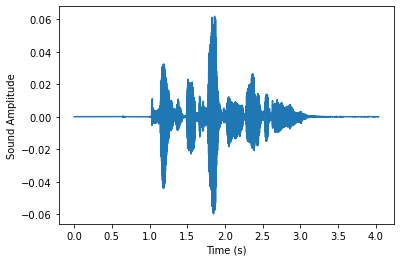

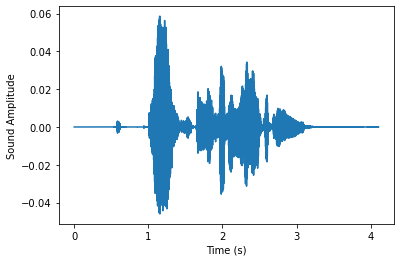

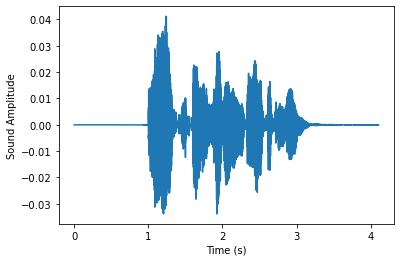

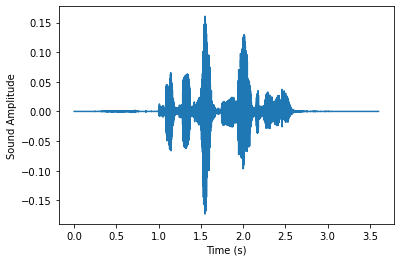

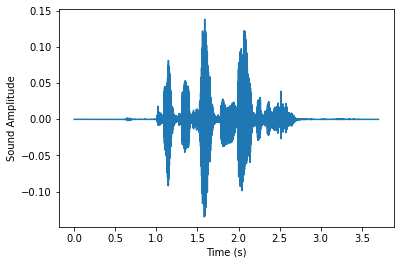

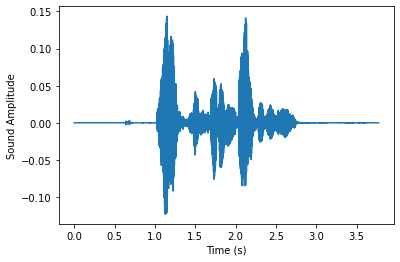

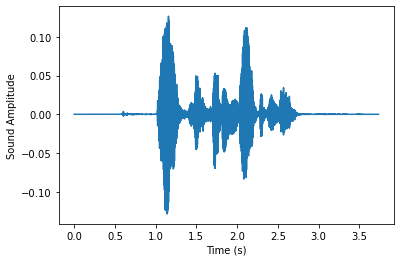

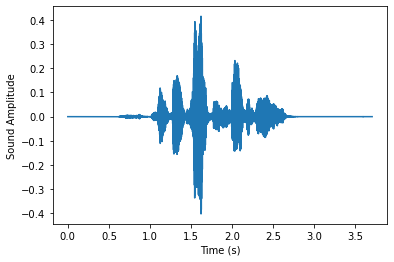

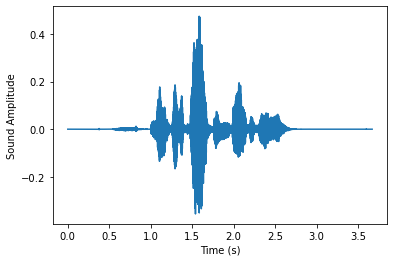

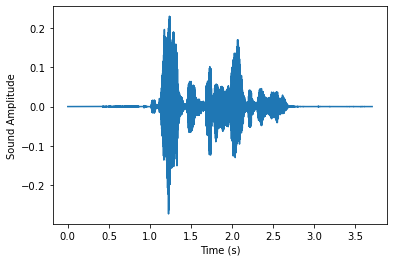

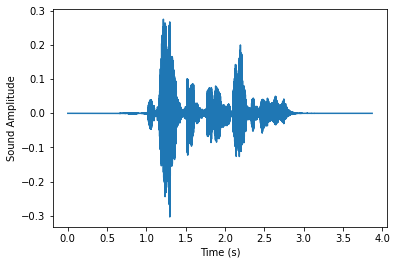

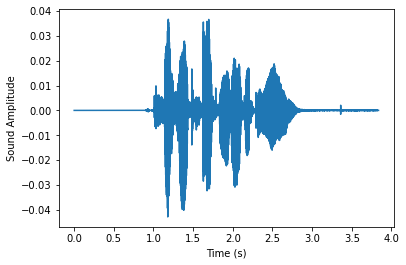

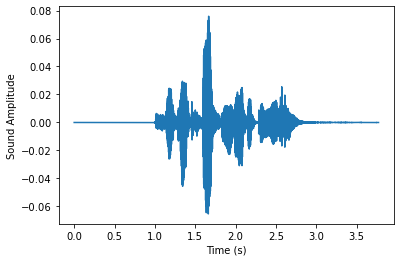

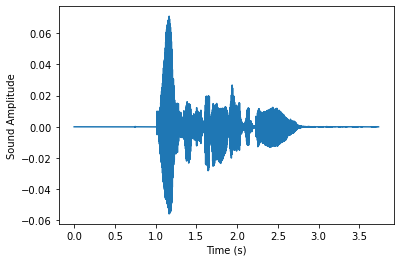

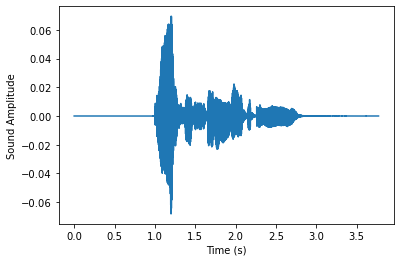

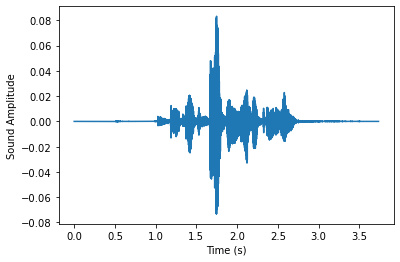

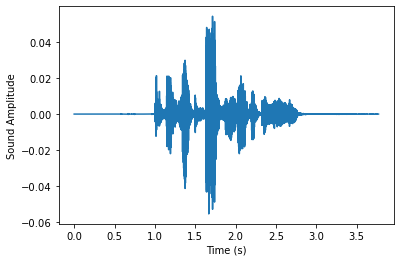

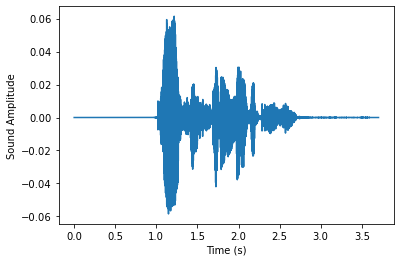

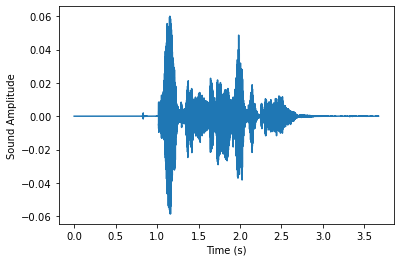

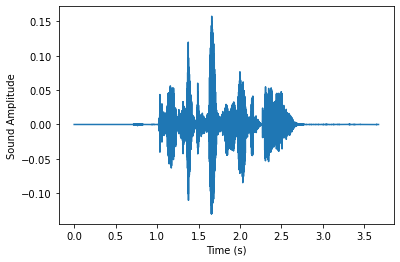

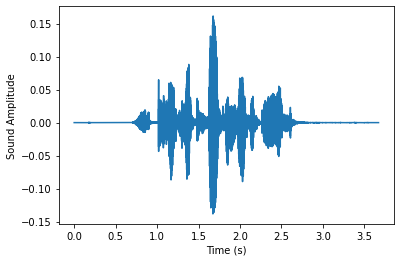

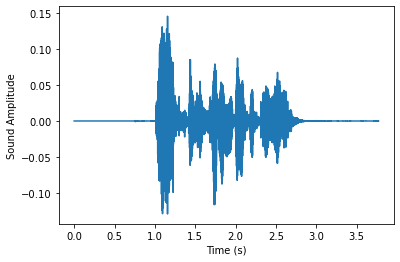

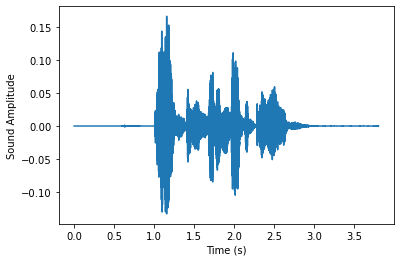

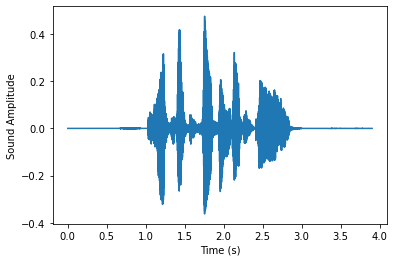

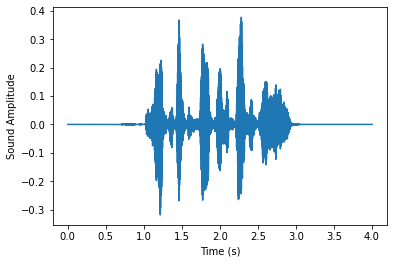

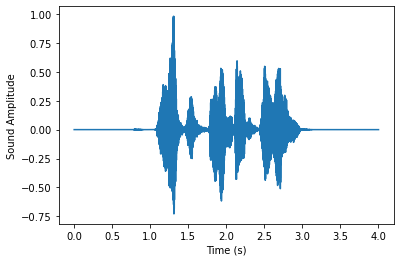

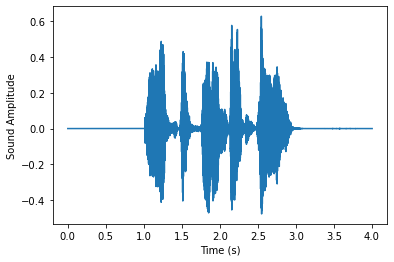

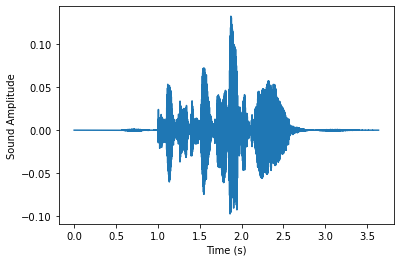

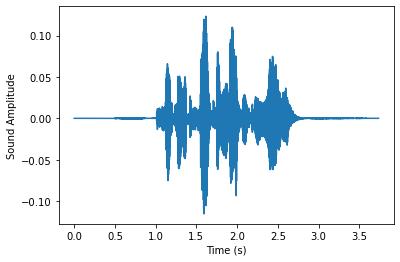

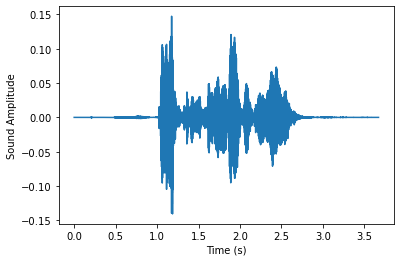

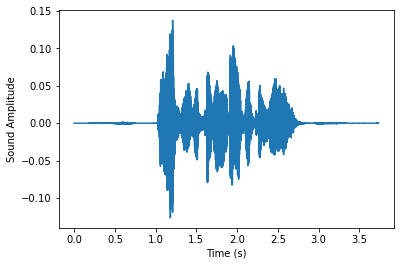

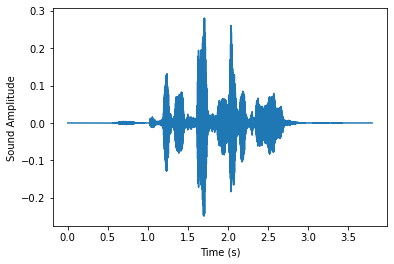

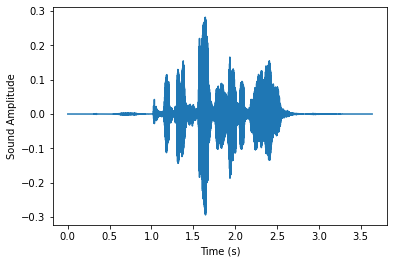

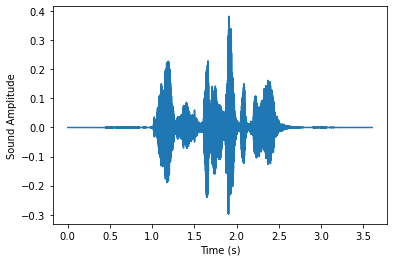

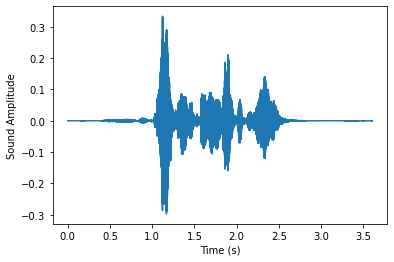

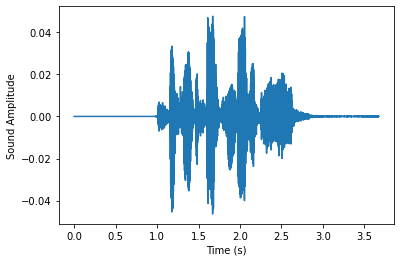

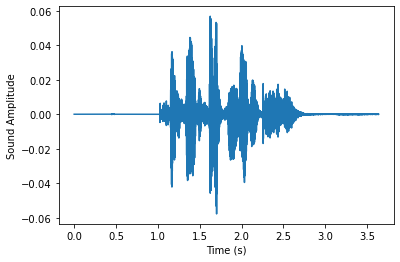

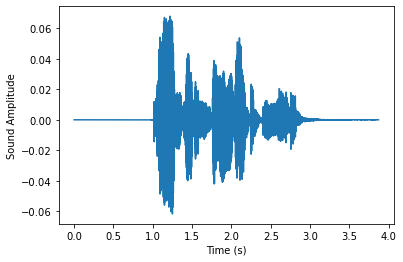

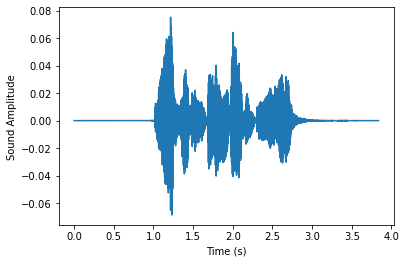

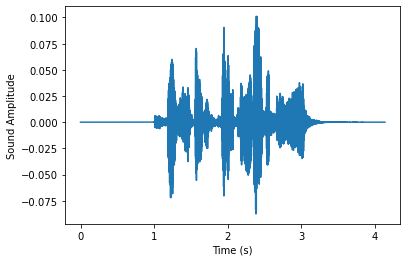

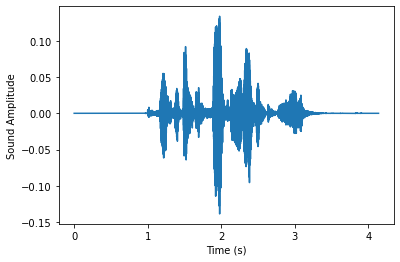

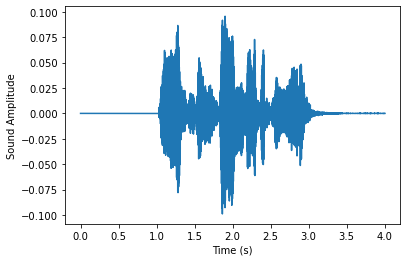

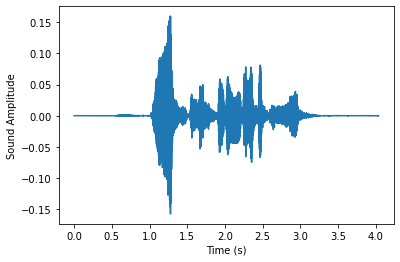

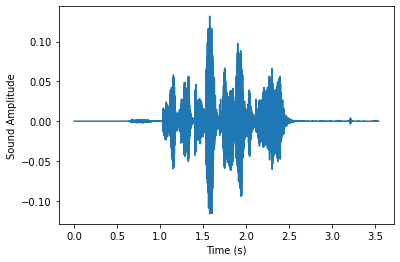

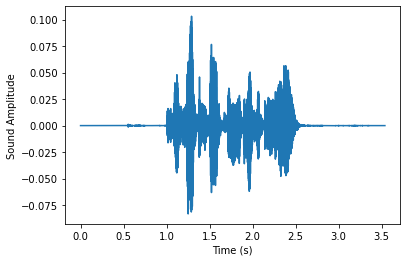

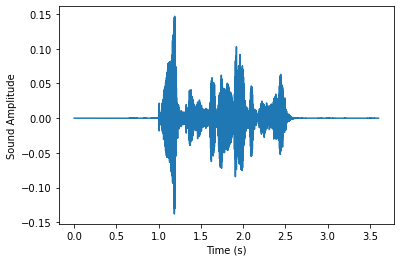

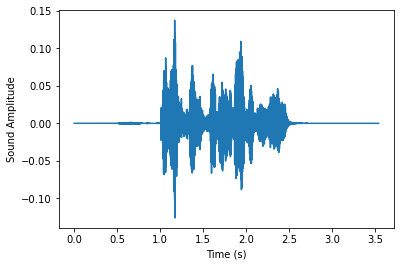

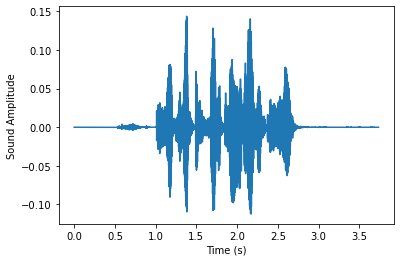

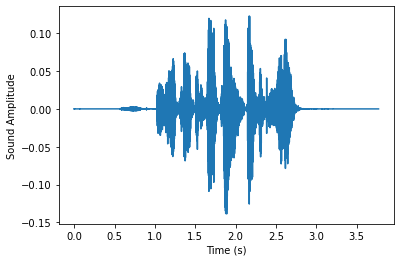

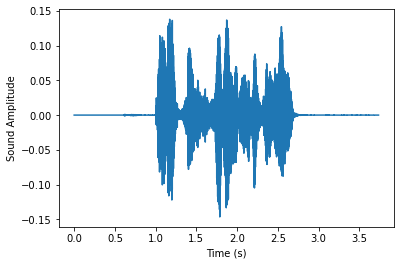

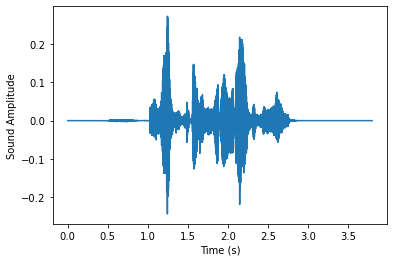

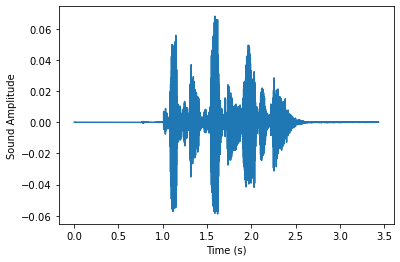

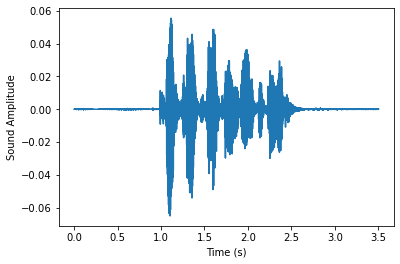

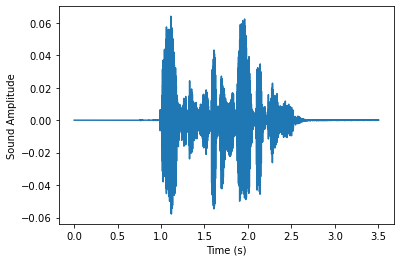

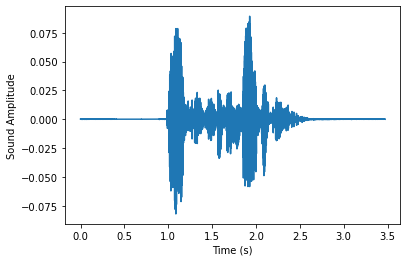

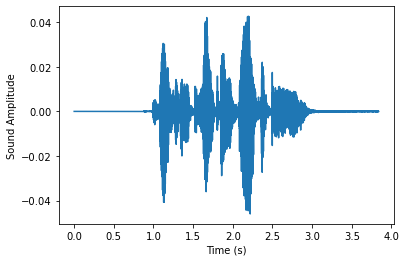

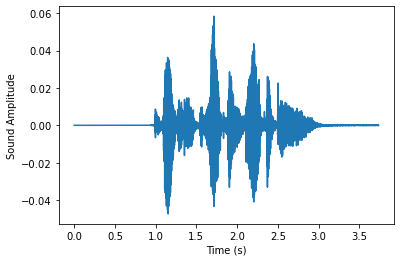

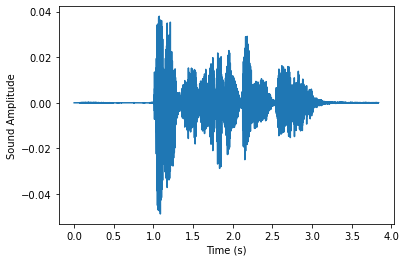

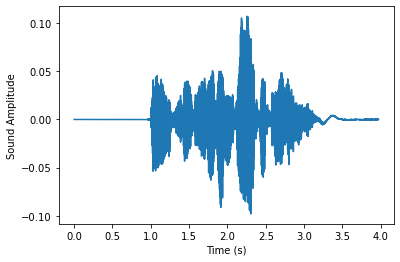

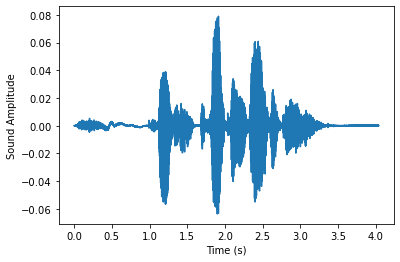

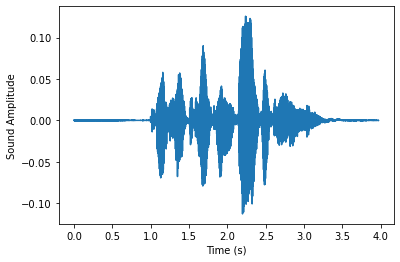

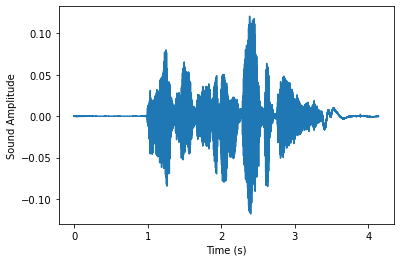

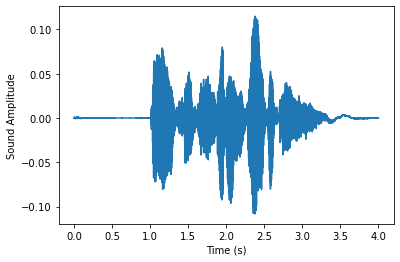

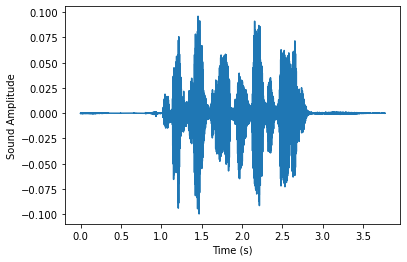

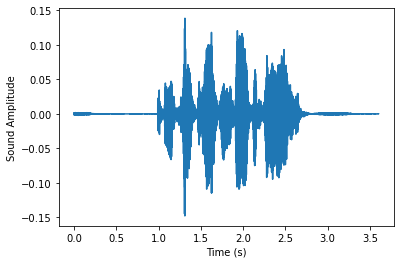

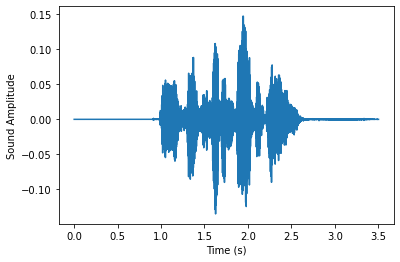

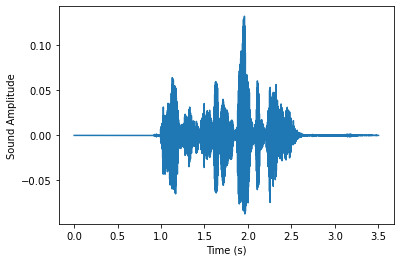

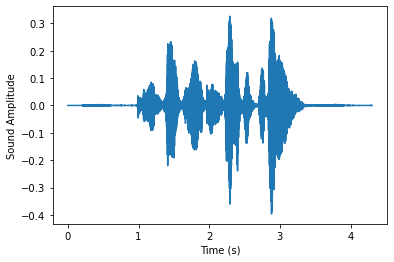

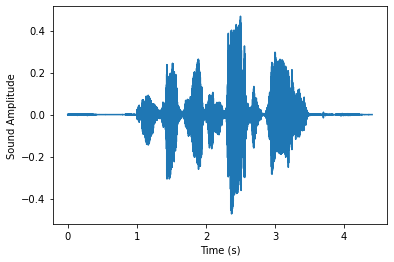

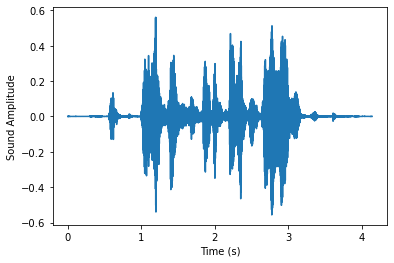

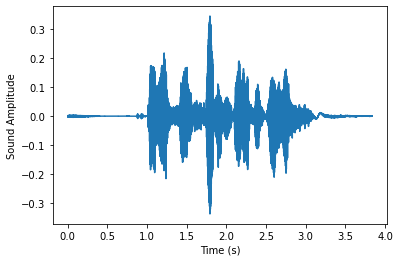

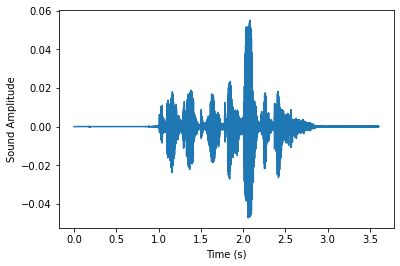

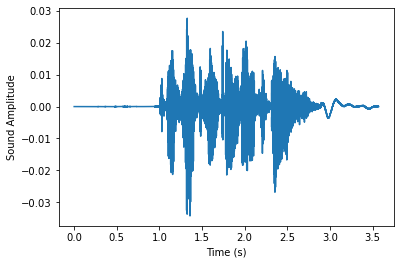

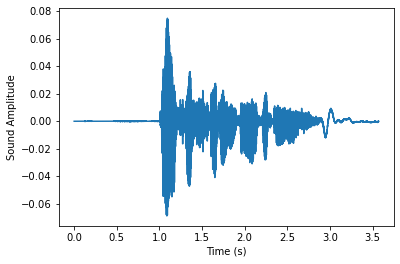

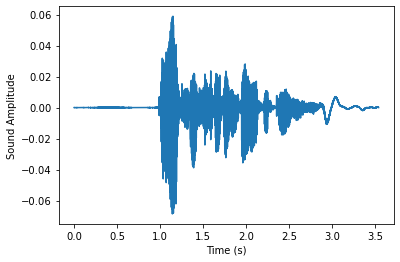

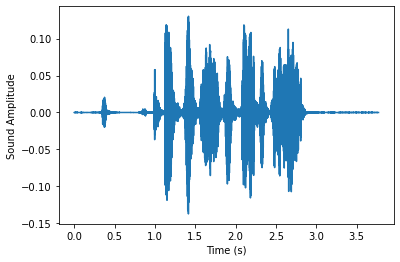

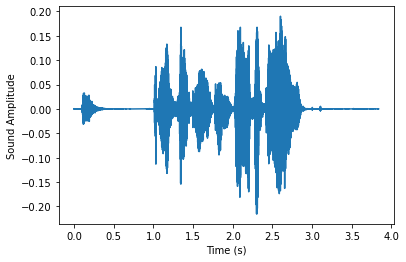

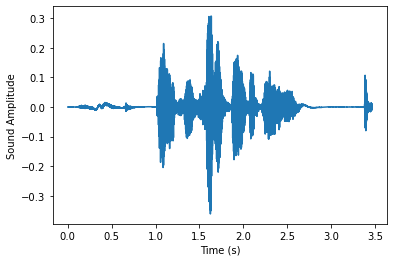

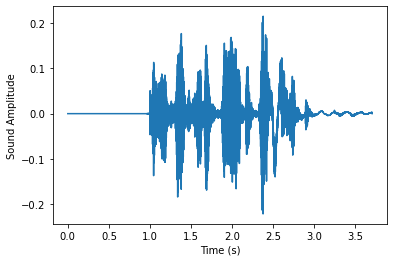

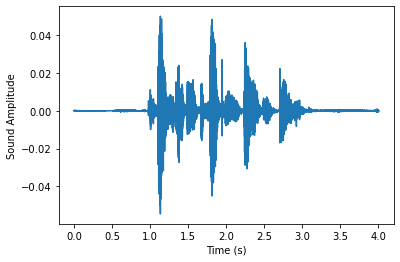

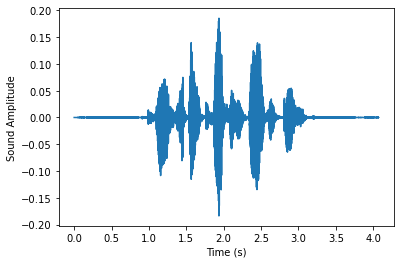

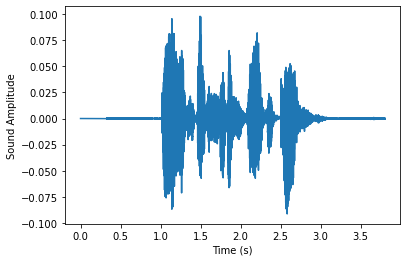

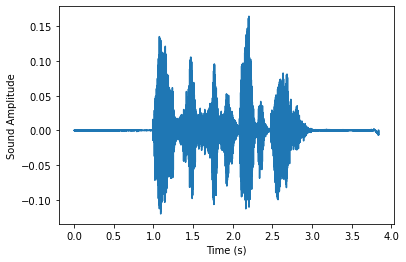

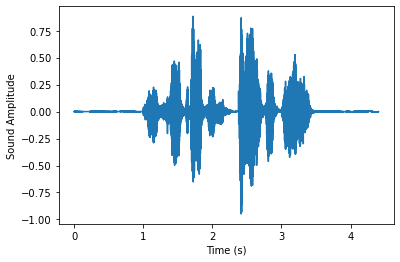

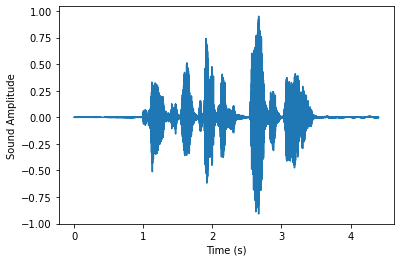

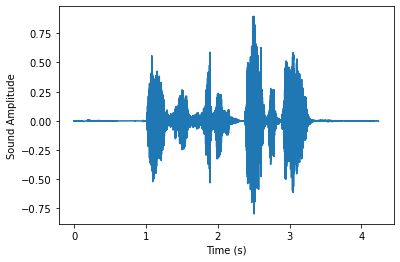

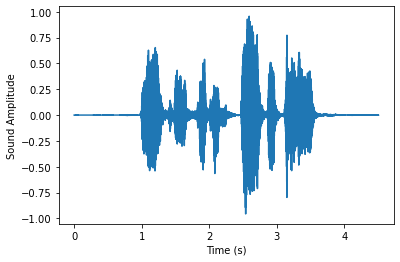

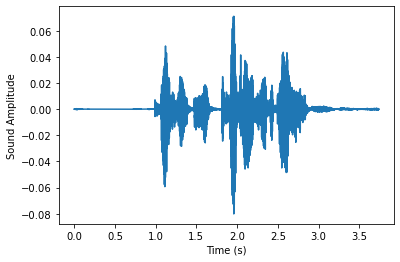

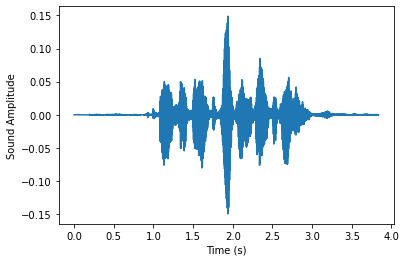

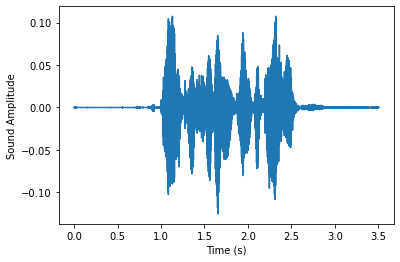

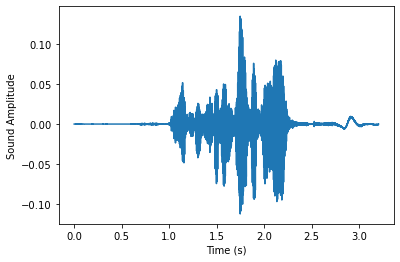

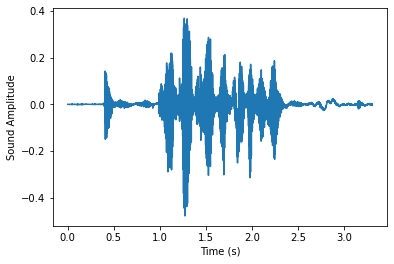

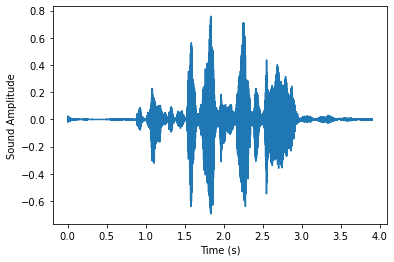

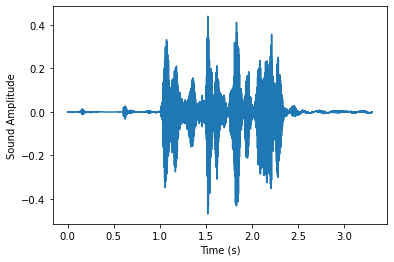

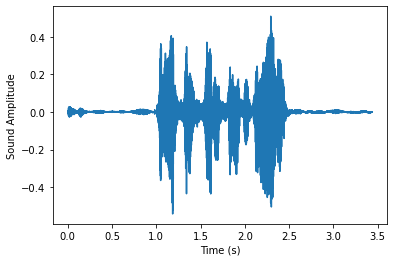

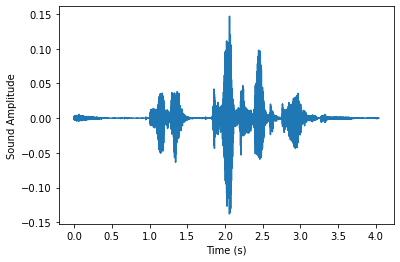

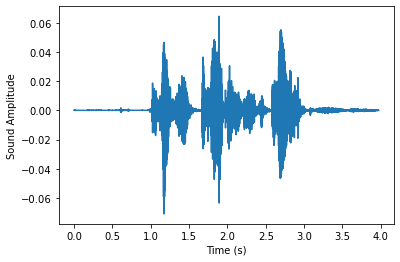

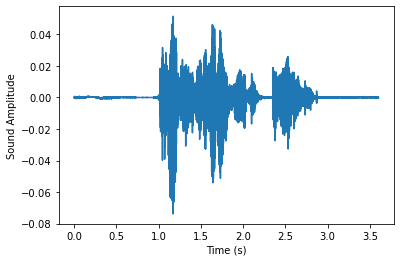

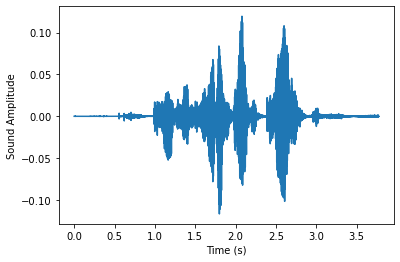

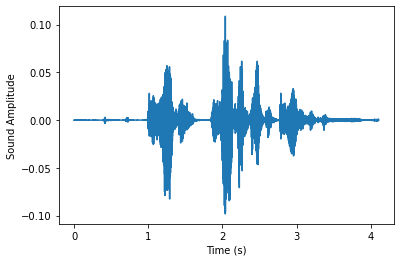

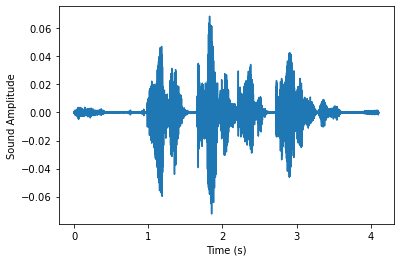

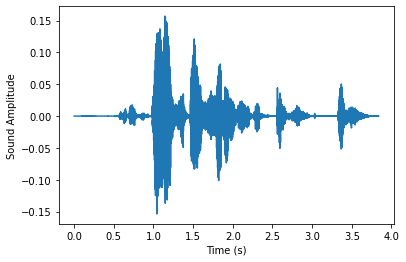

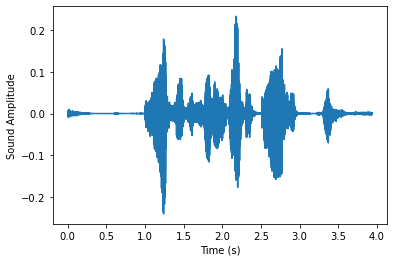

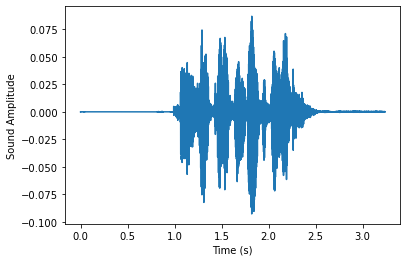

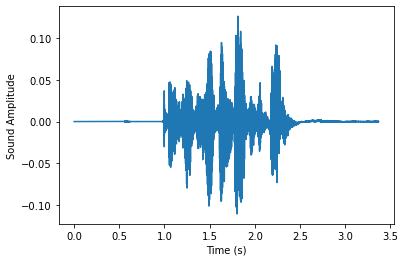

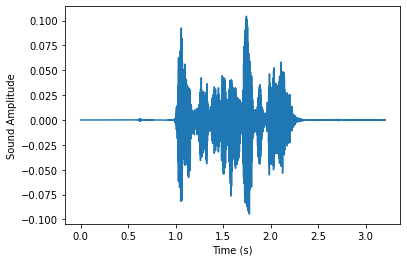

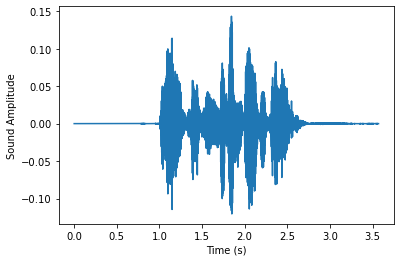

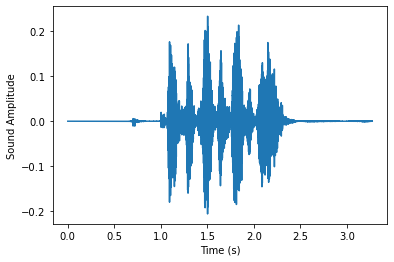

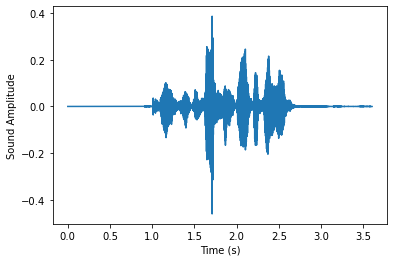

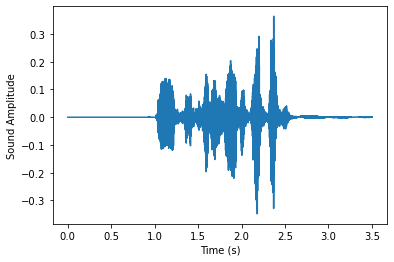

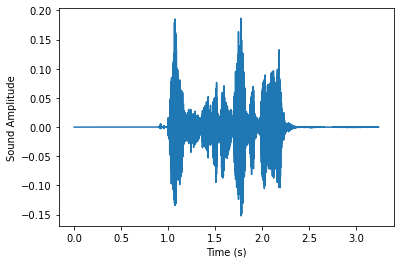

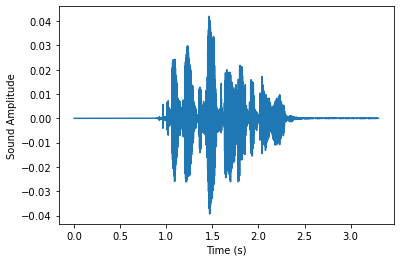

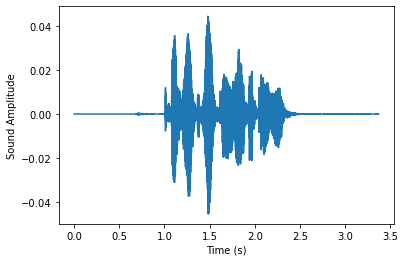

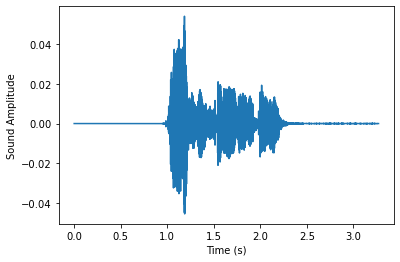

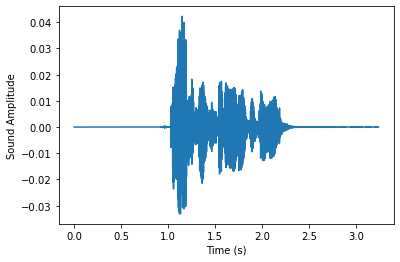

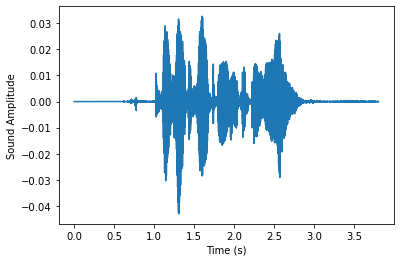

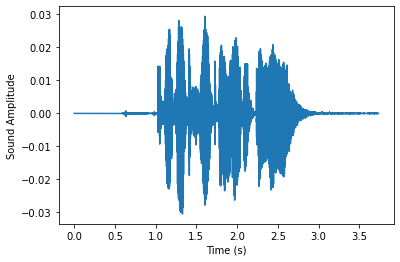

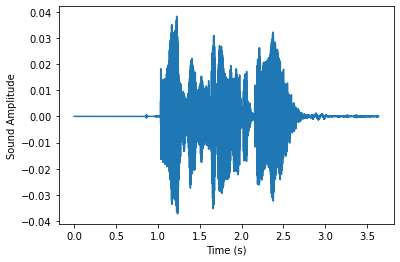

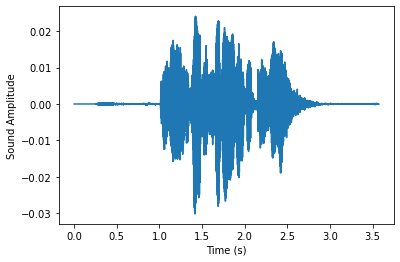

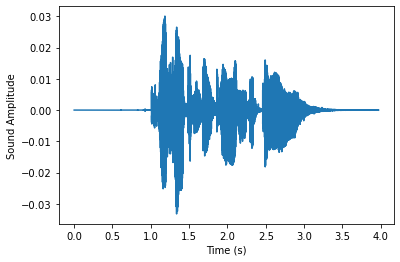

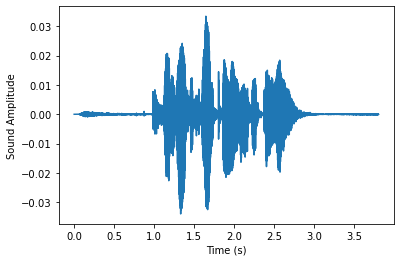

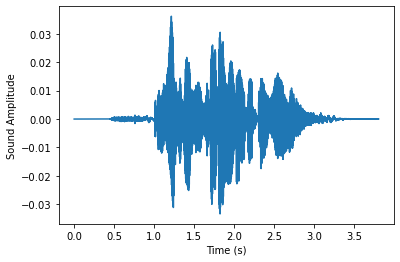

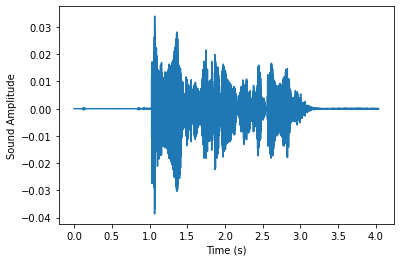

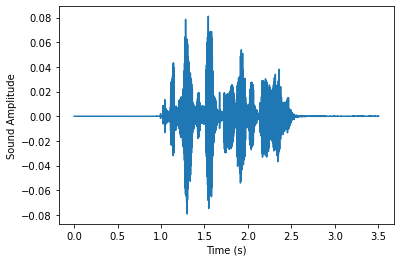

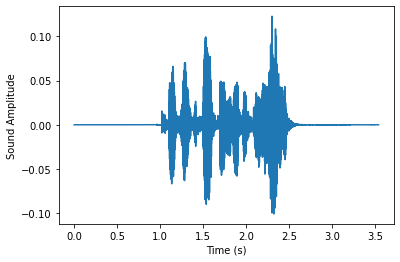

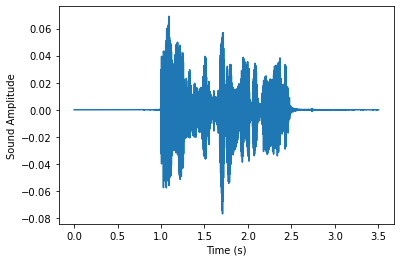

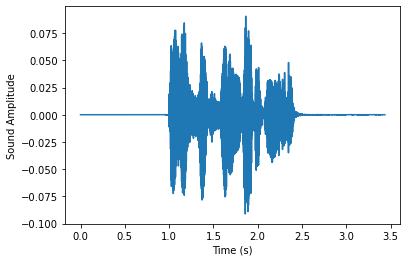

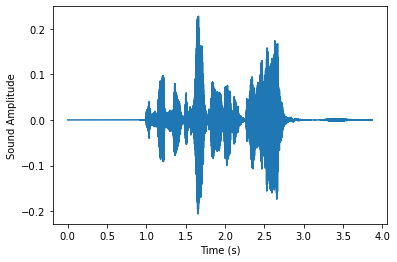

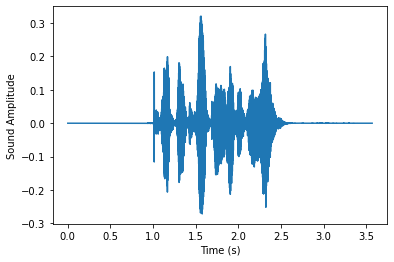

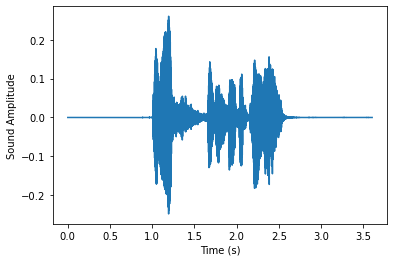

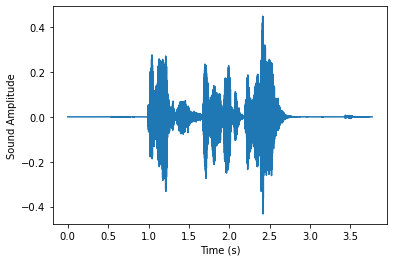

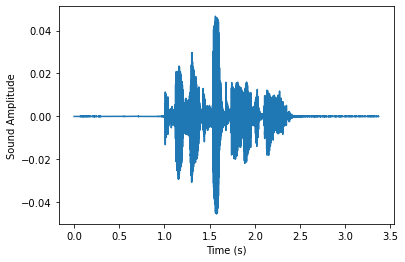

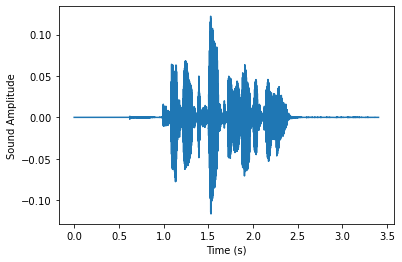

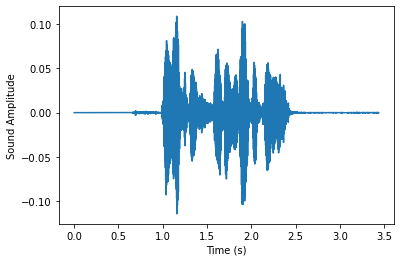

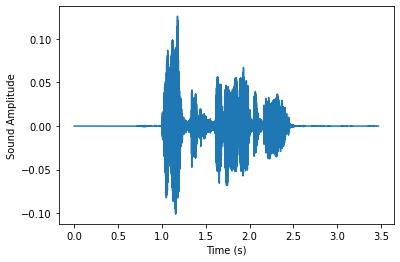

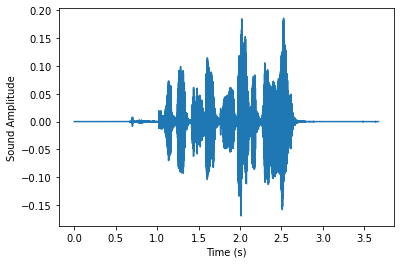

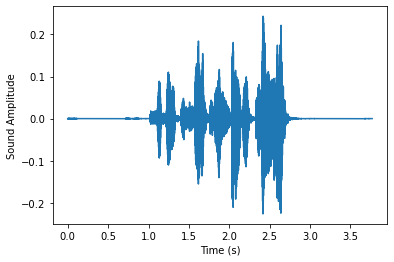

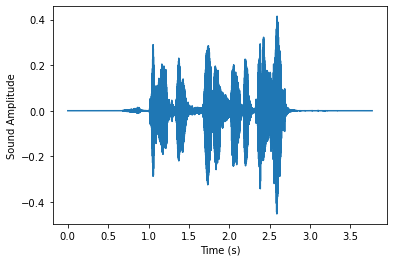

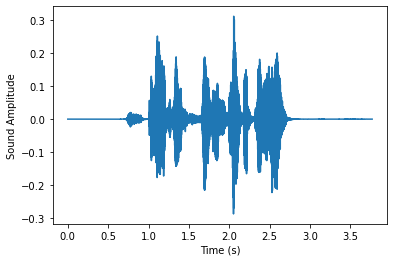

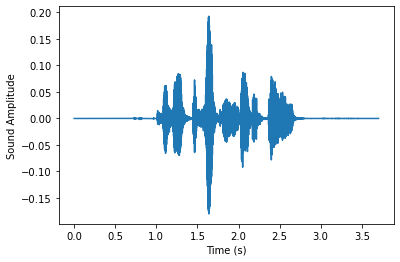

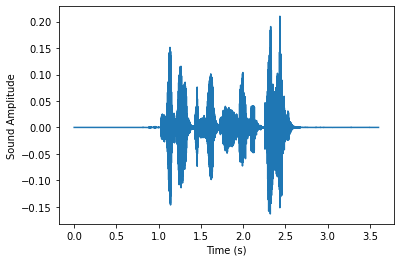

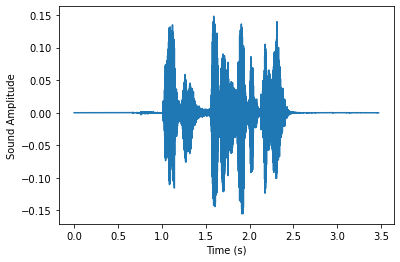

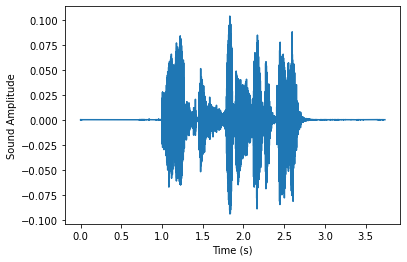

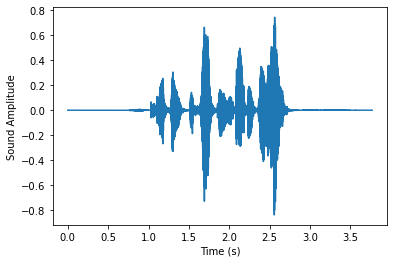

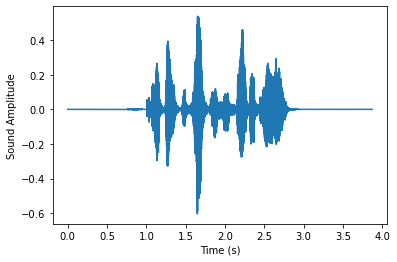

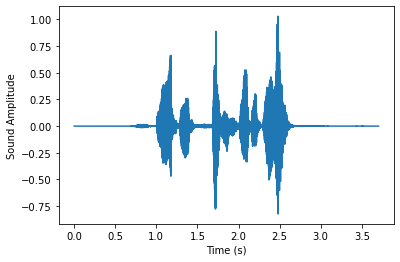

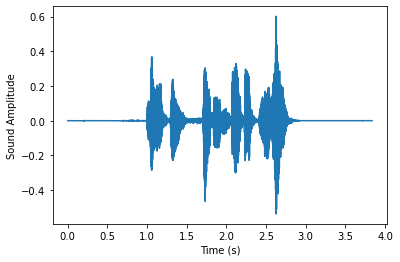

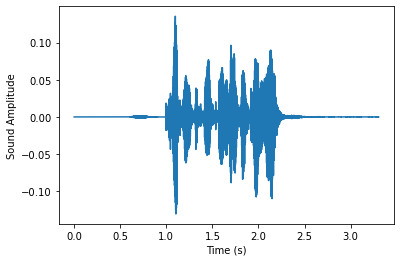

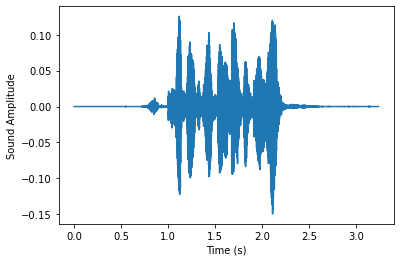

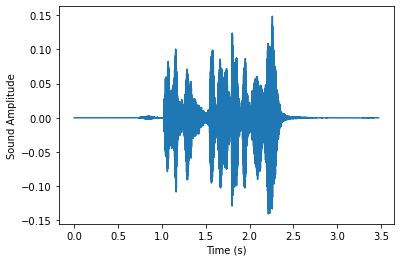

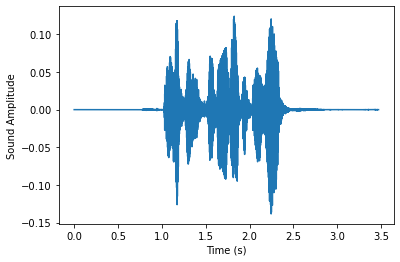

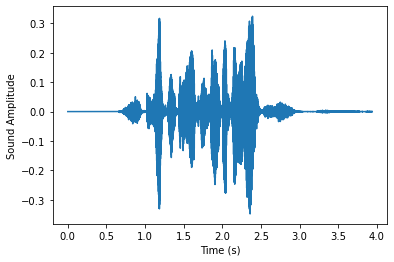

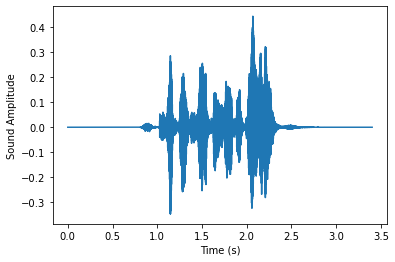

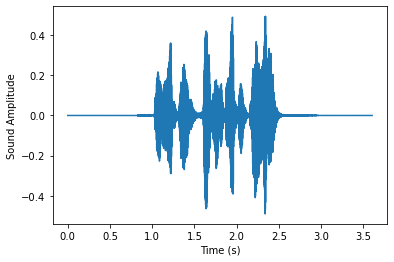

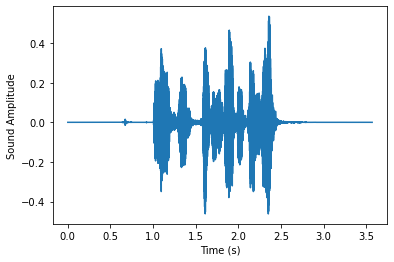

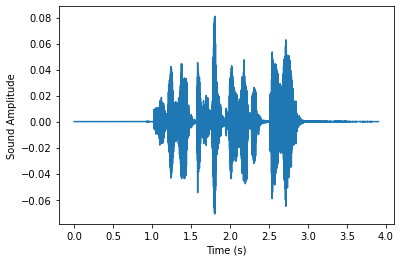

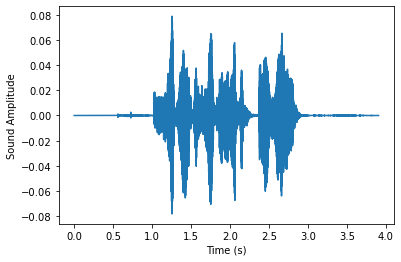

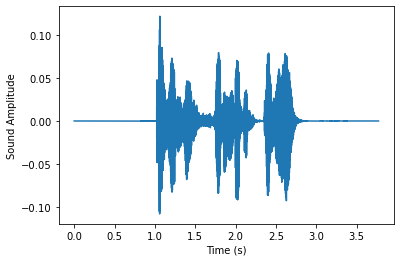

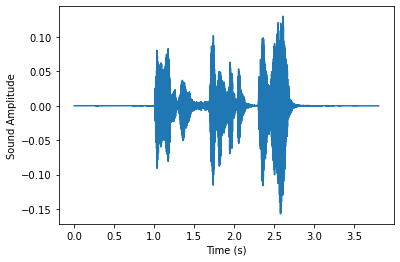

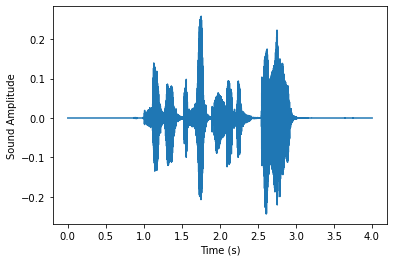

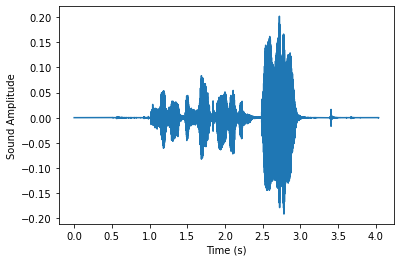

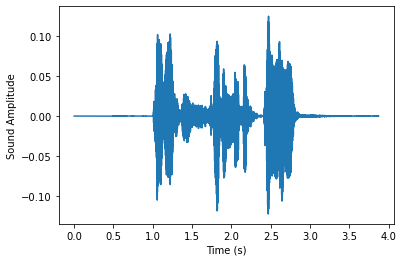

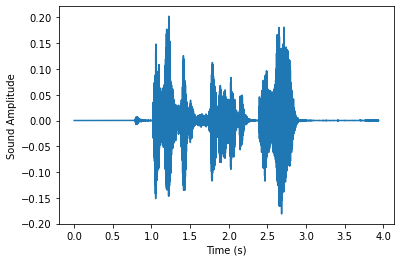

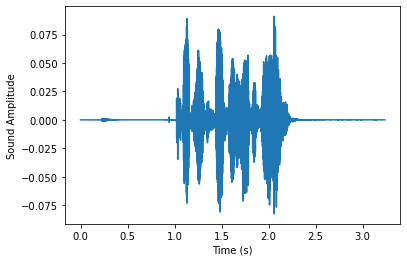

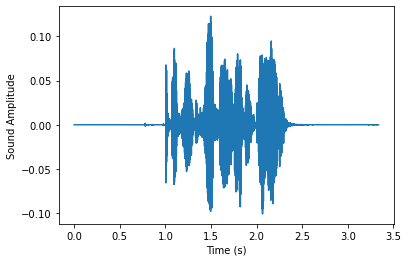

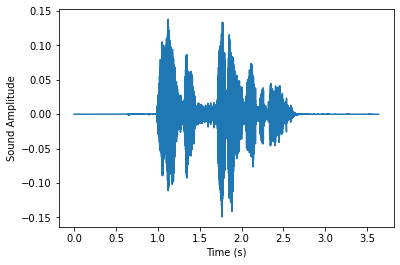

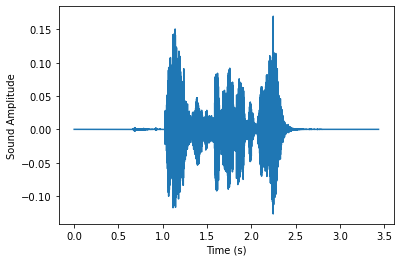

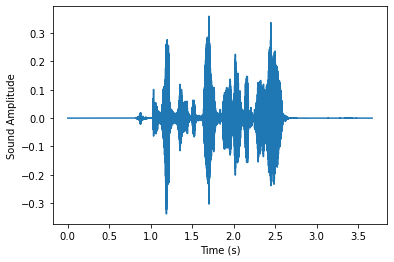

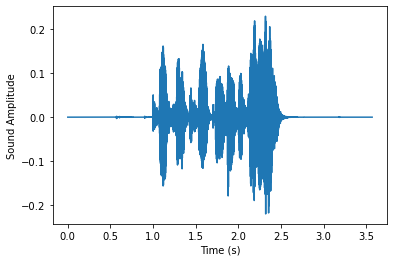

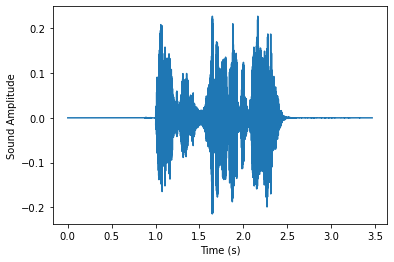

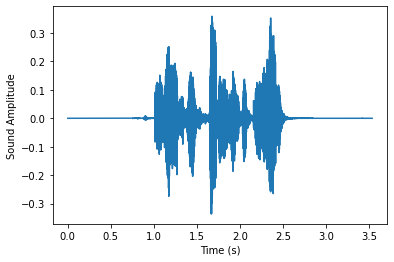

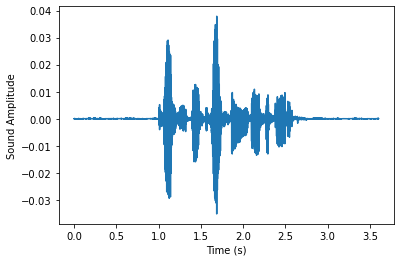

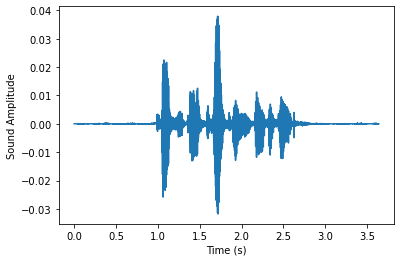

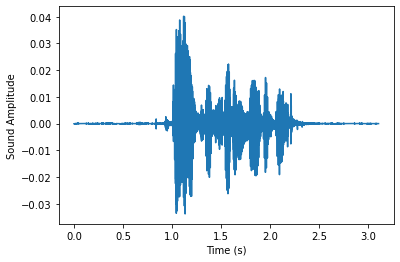

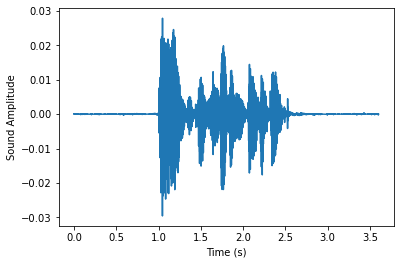

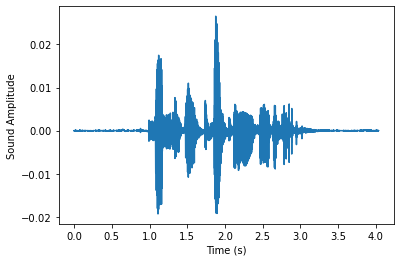

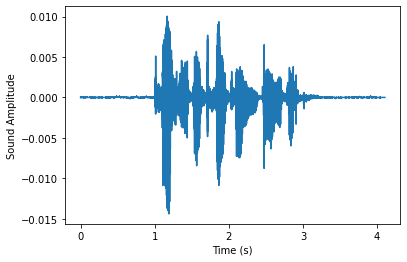

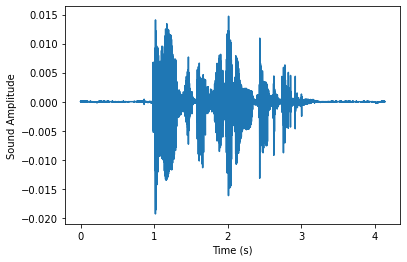

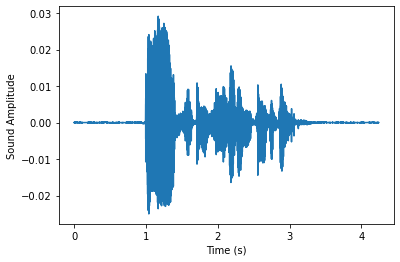

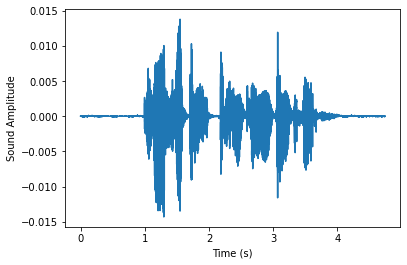

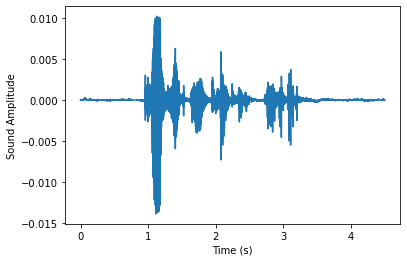

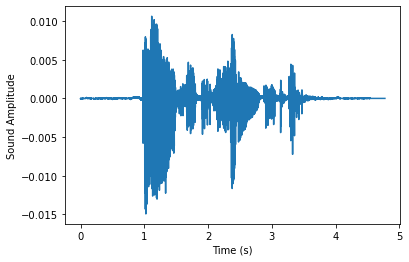

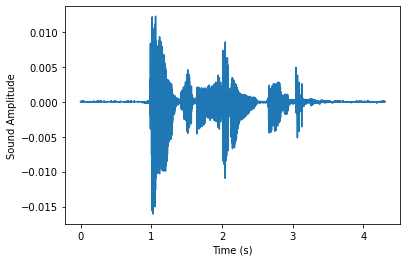

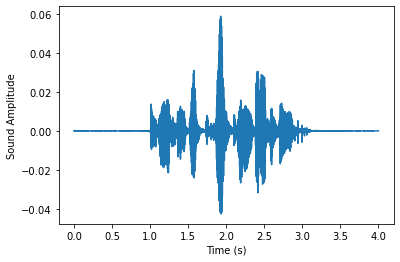

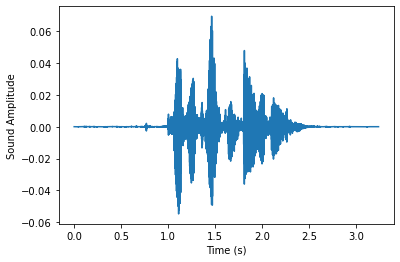

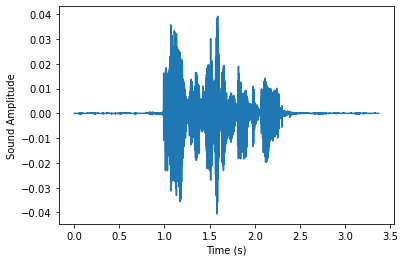

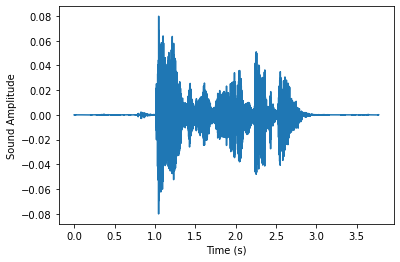

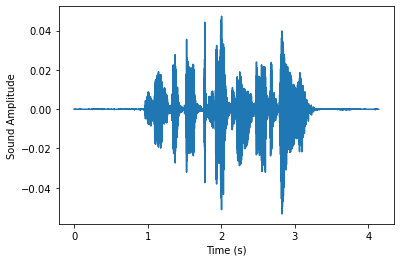

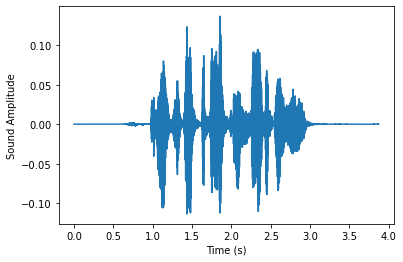

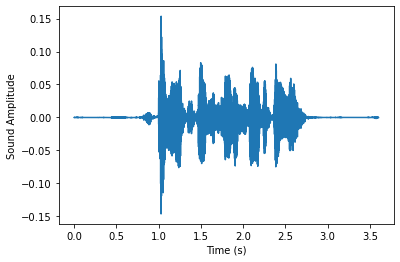

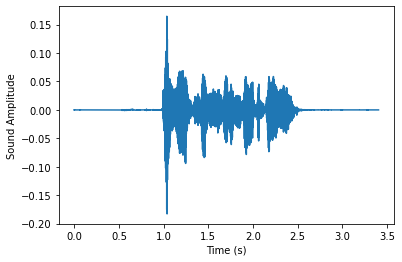

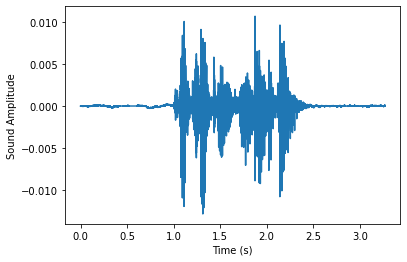

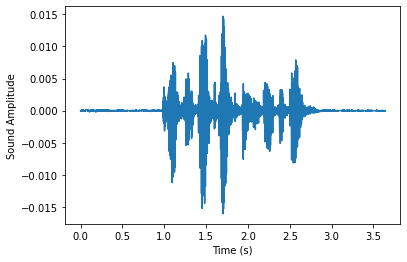

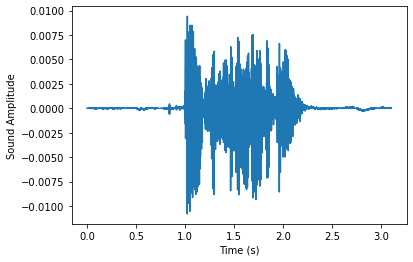

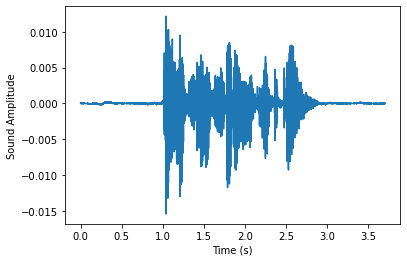

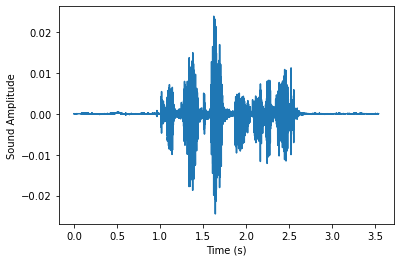

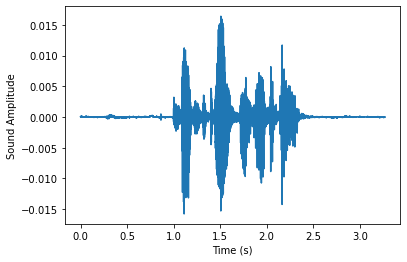

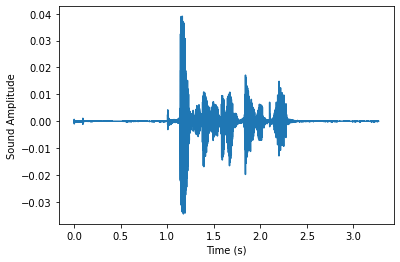

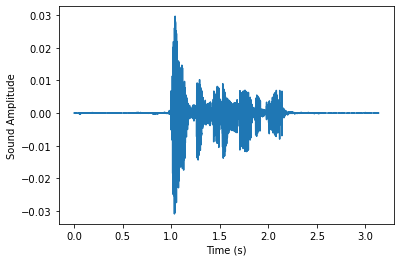

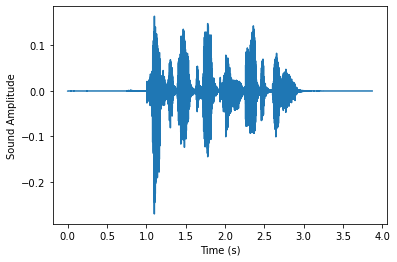

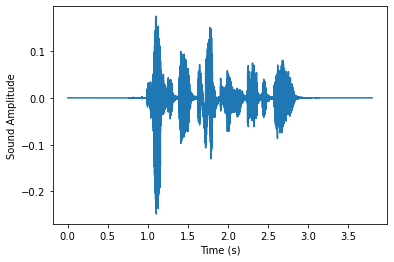

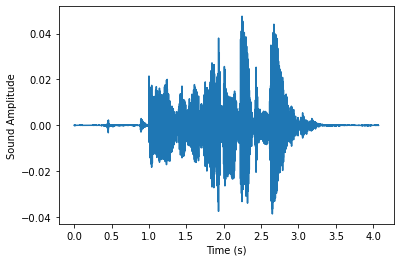

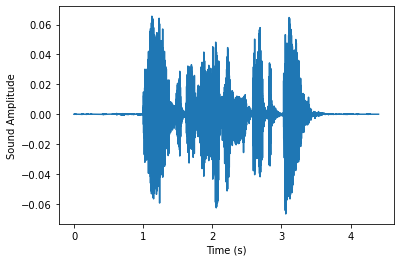

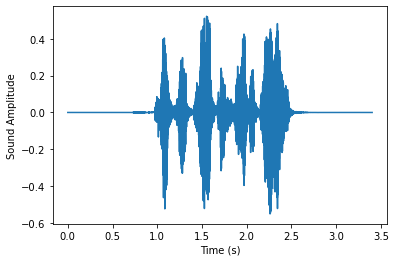

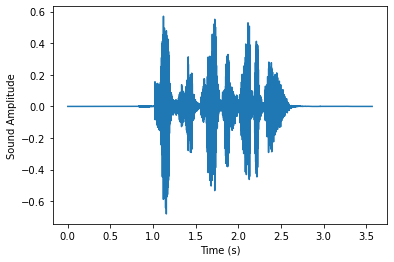

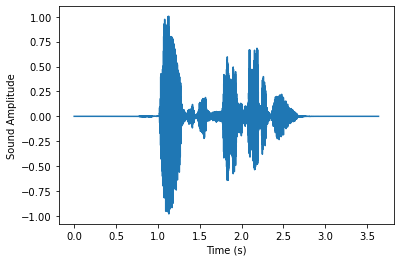

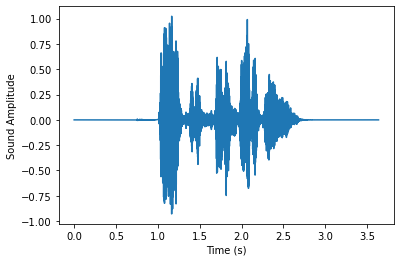

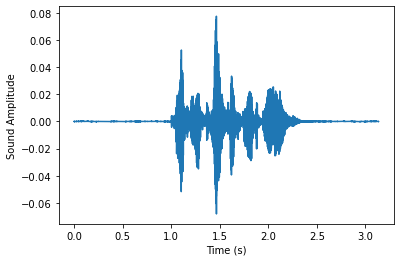

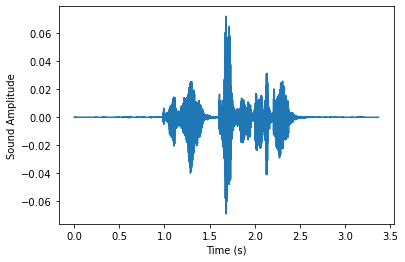

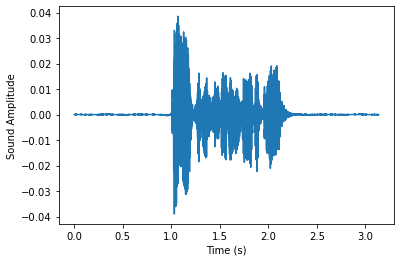

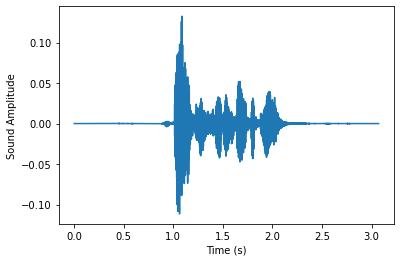

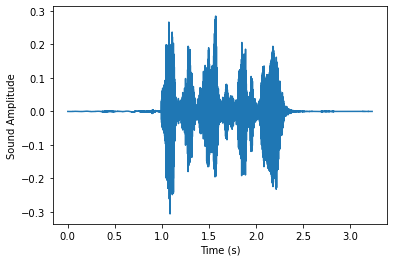

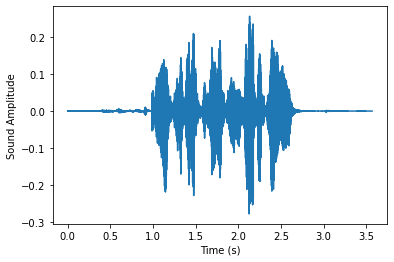

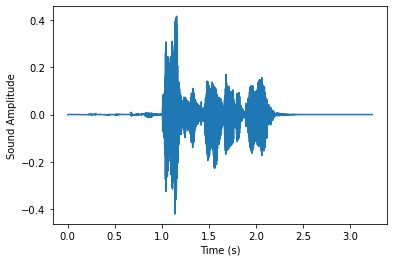

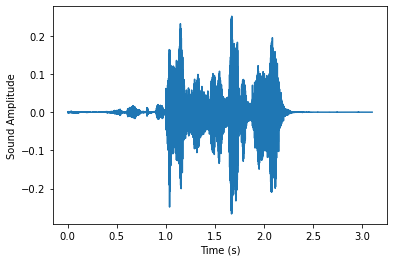

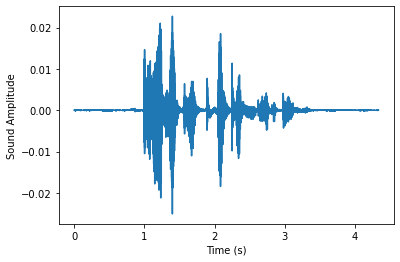

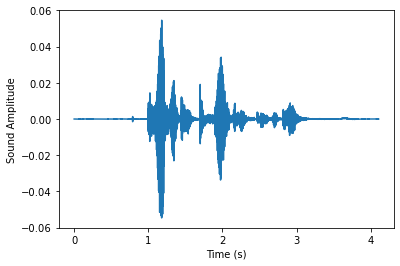

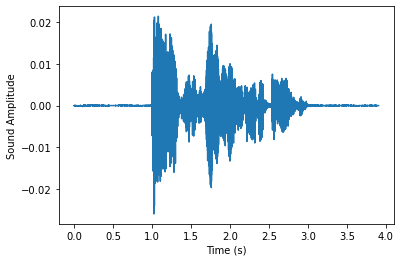

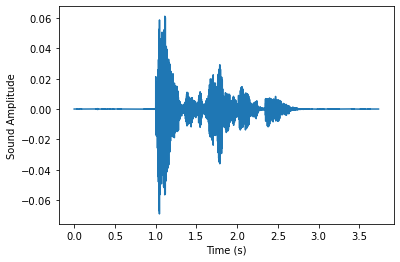

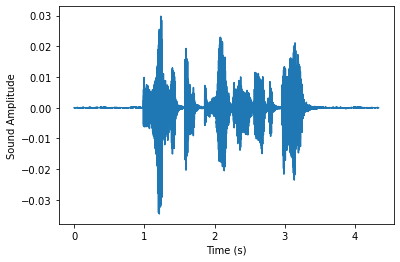

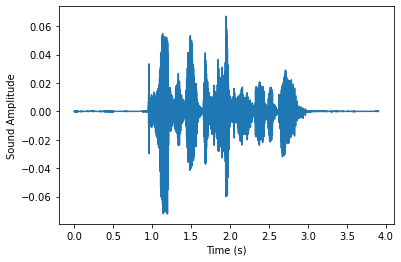

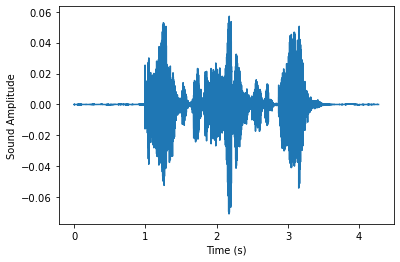

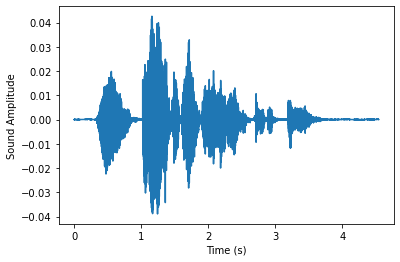

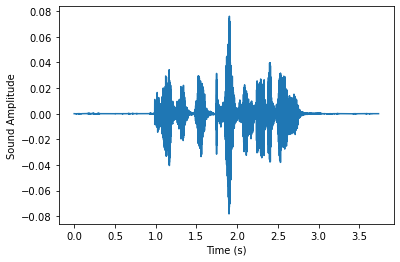

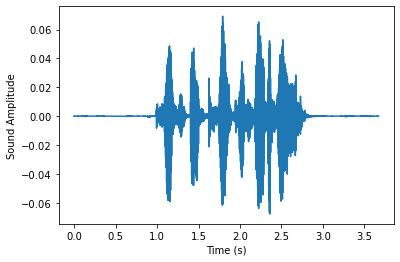

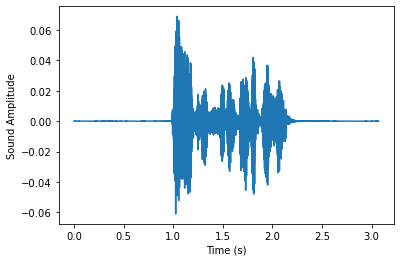

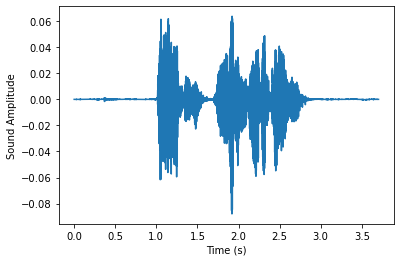

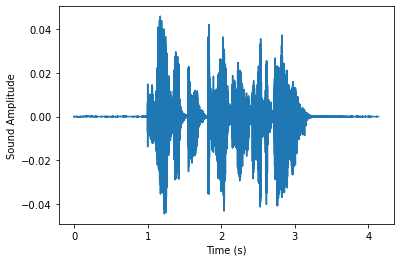

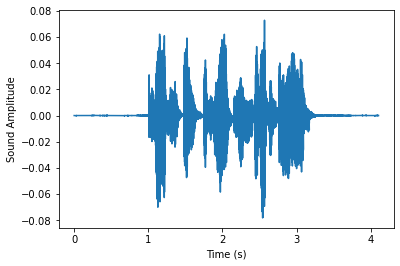

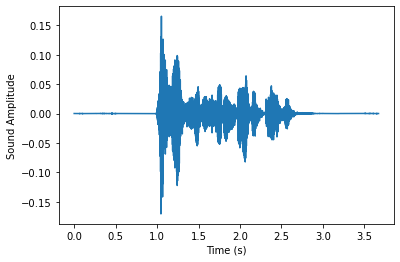

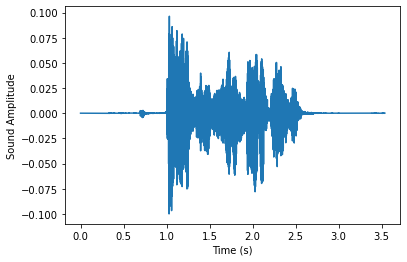

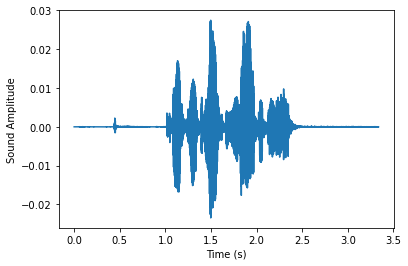

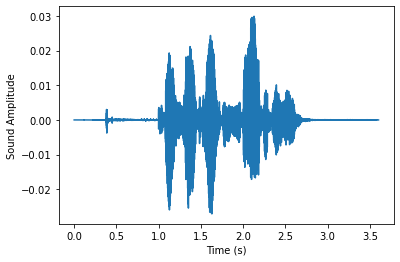

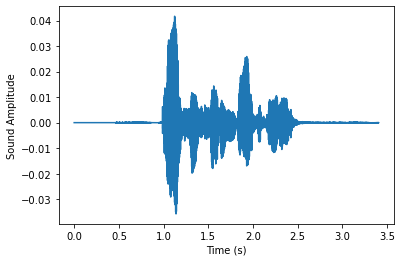

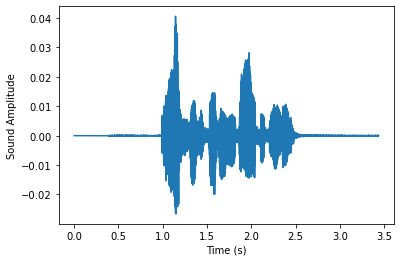

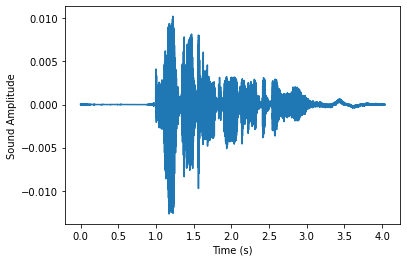

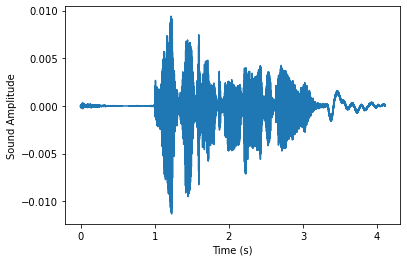

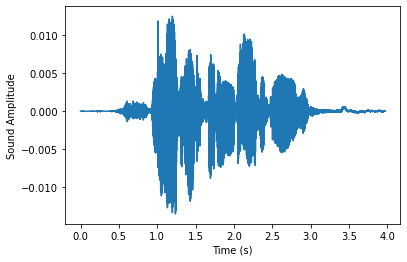

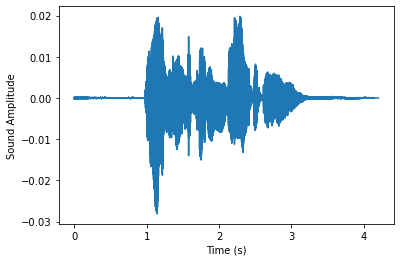

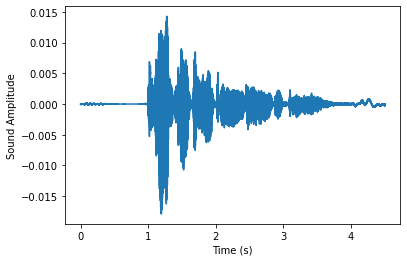

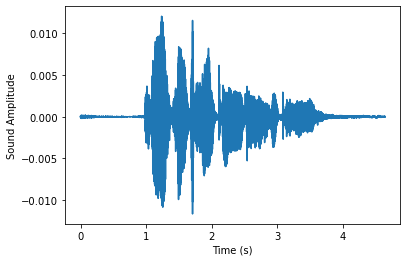

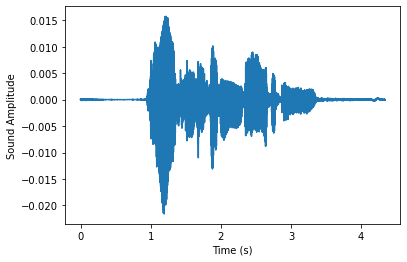

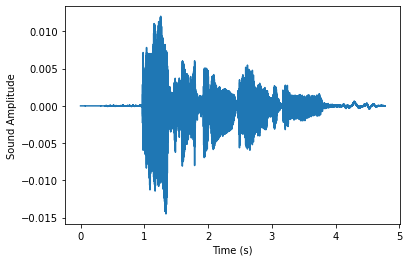

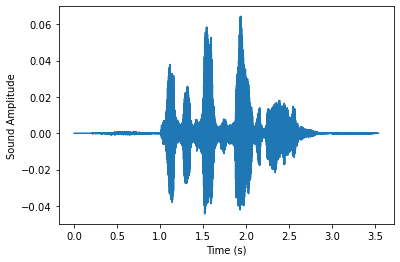

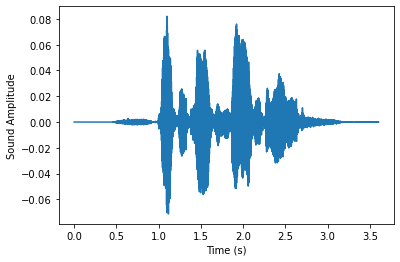

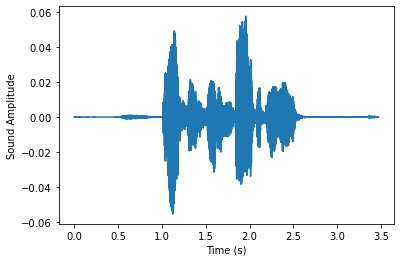

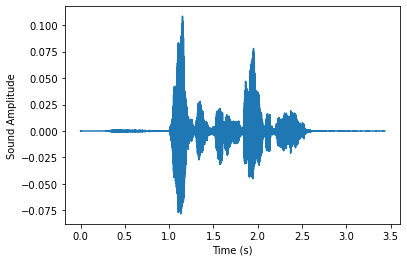

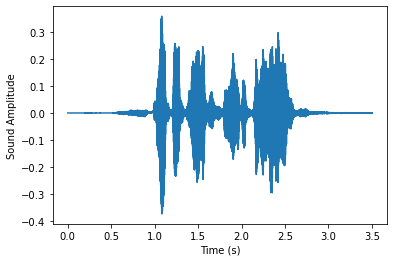

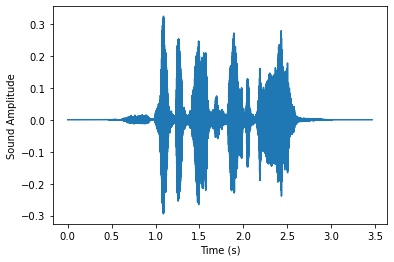

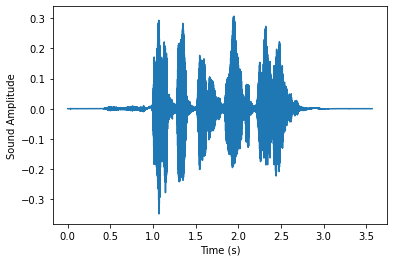

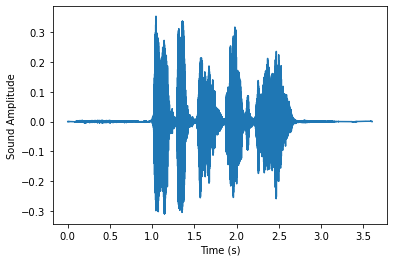

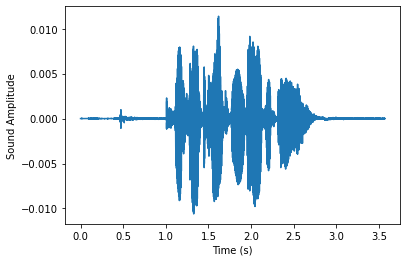

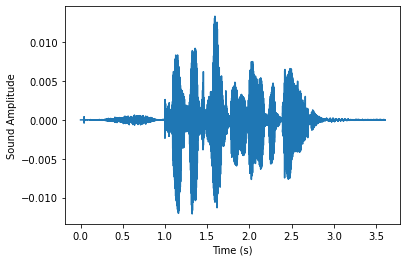

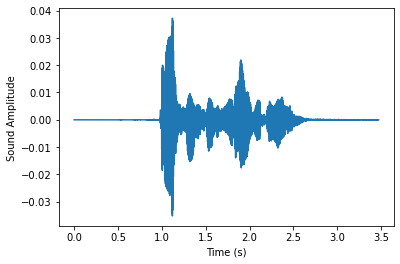

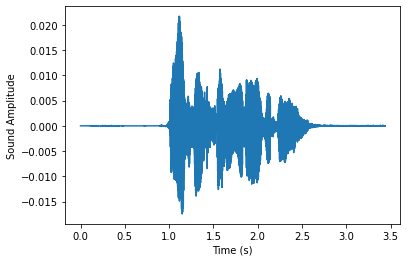

KeyboardInterrupt: 

In [34]:
#Plotting the Basic Graphs for understanding of Audio Files :
for file in range(0 , len(listOfFiles) , 1):
    audio , sfreq = lr.load(listOfFiles[file])
    time = np.arange(0 , len(audio)) / sfreq
    
    fig ,ax = plt.subplots()
    ax.plot(time , audio)
    ax.set(xlabel = 'Time (s)' , ylabel = 'Sound Amplitude')
    plt.show()
    
#PLOT THE SEPCTOGRAM
for file in range(0 , len(listOfFiles) , 1):
     sample_rate , samples = wavfile.read(listOfFiles[file])
     frequencies , times, spectrogram = signal.spectrogram(samples, sample_rate) 
     plt.pcolormesh(times, frequencies, spectrogram)
     plt.imshow(spectrogram)
     plt.ylabel('Frequency [Hz]')
     plt.xlabel('Time [sec]')
     plt.show()

In [11]:
#Next Step is In-Depth Visualisation of Audio Fiels and its certain features to plot for.
#They are the Plotting Functions to be called later. 
def plot_signals(signals):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Time Series' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def plot_fft(fft):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transform' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y,freq = data[0] , data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq , Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
    
def plot_fbank(fbank):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
            
def plot_mfccs(mfccs):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Capstrum  Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                             cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def calc_fft(y,rate):
    n = len(y)
    freq = np.fft.rfftfreq(n , d= 1/rate)
    Y= abs(np.fft.rfft(y)/n)
    return(Y,freq)

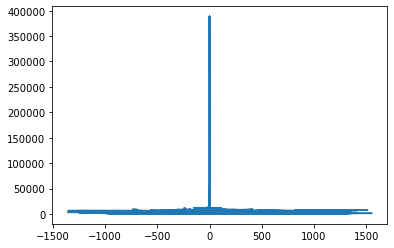

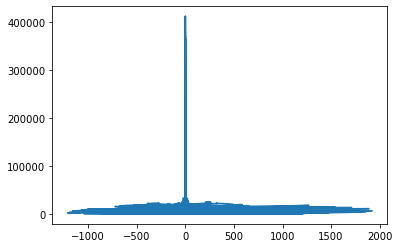

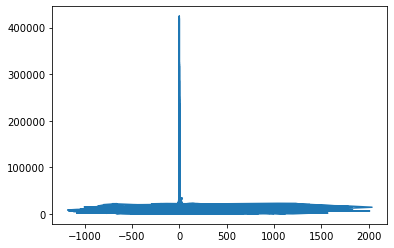

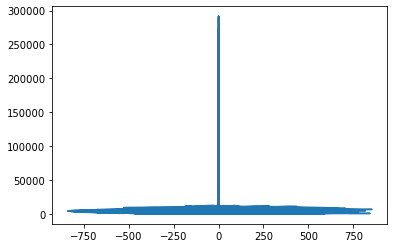

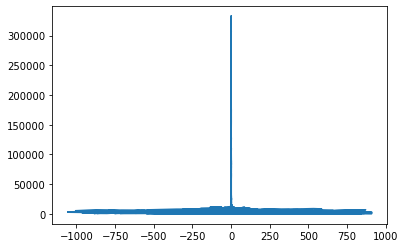

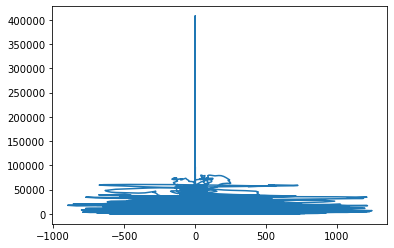

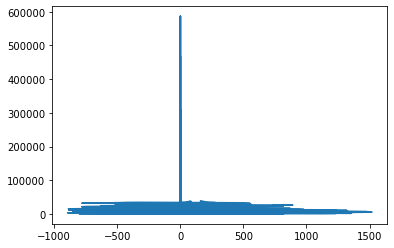

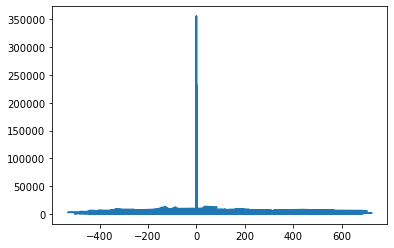

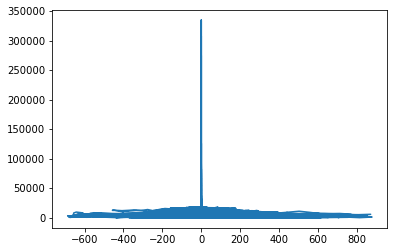

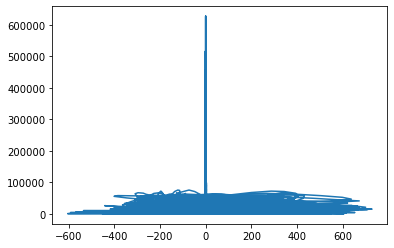

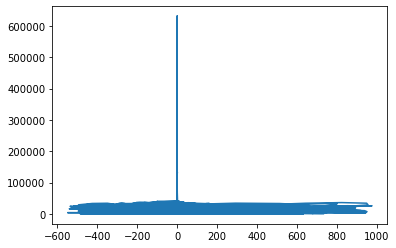

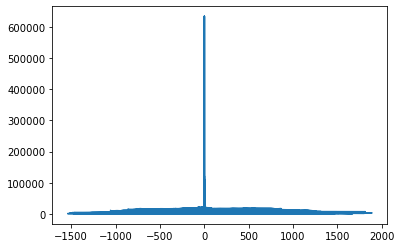

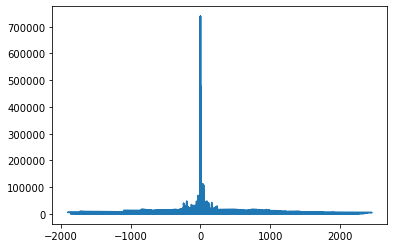

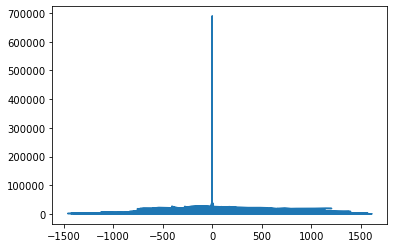

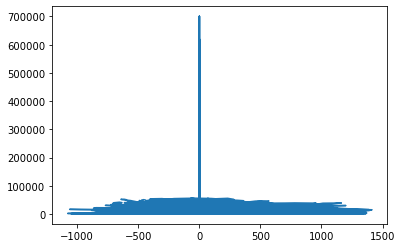

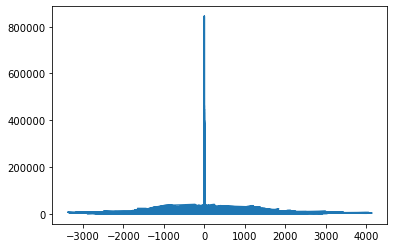

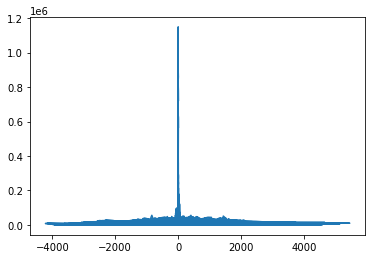

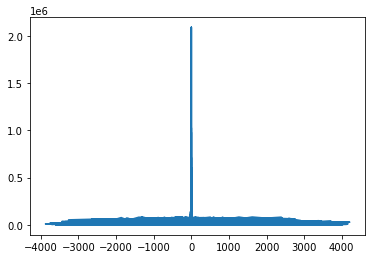

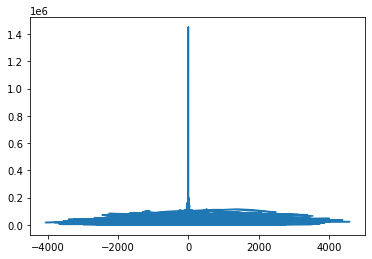

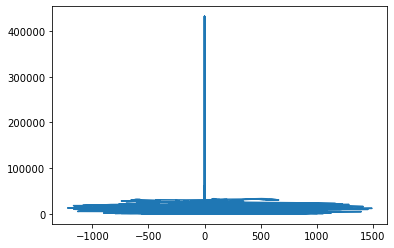

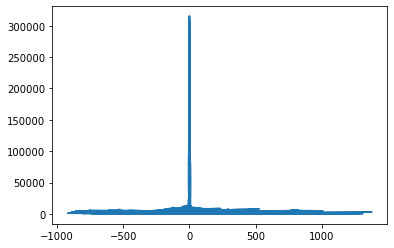

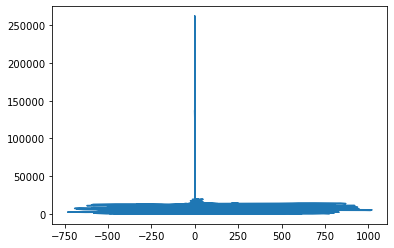

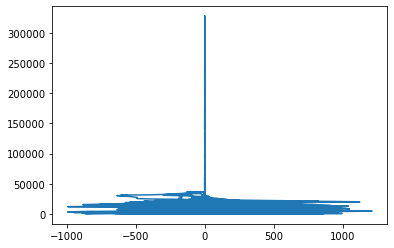

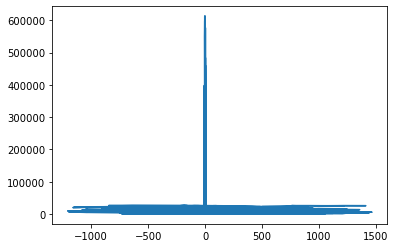

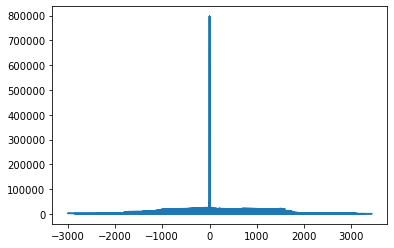

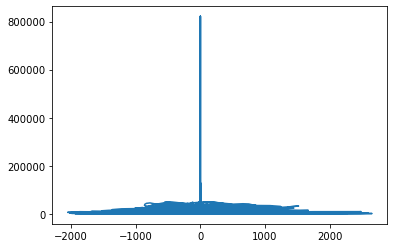

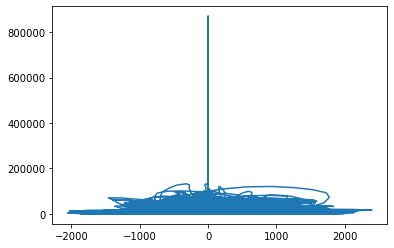

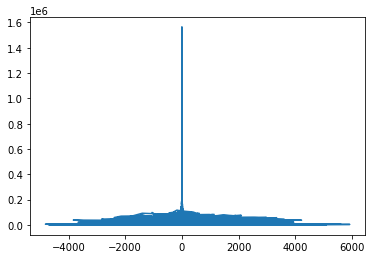

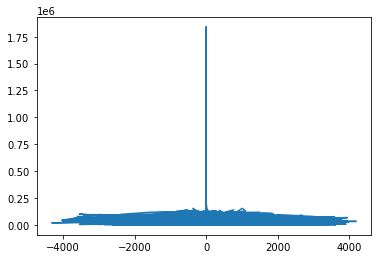

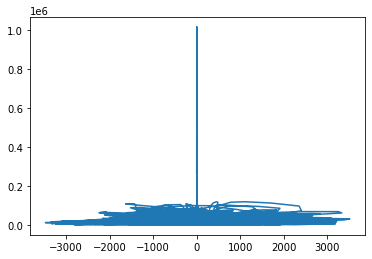

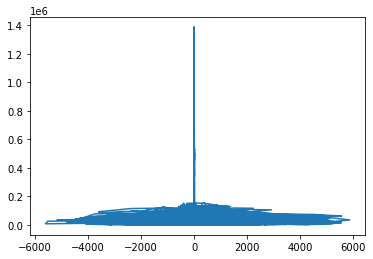

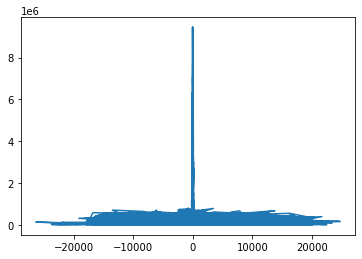

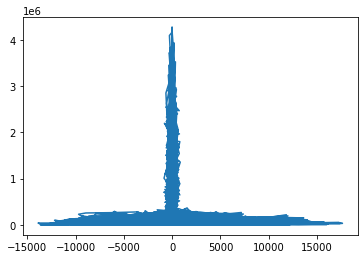

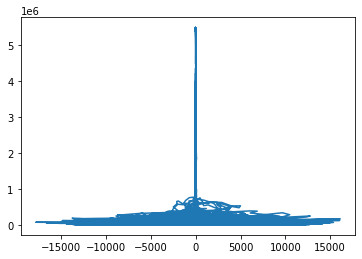

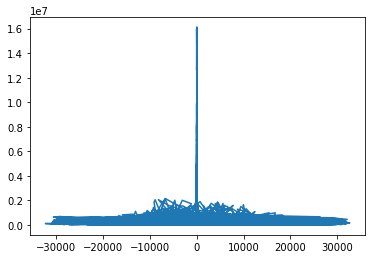

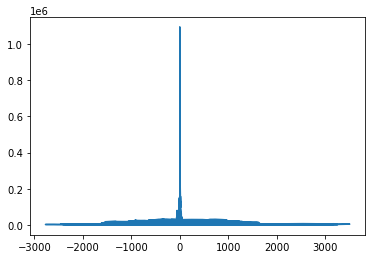

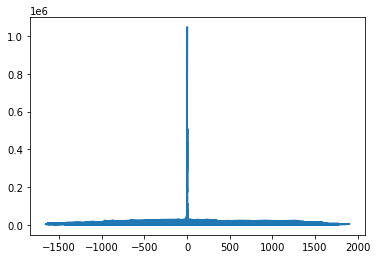

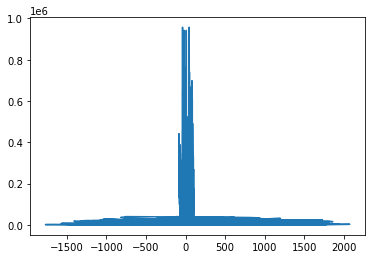

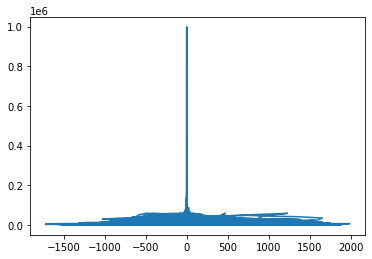

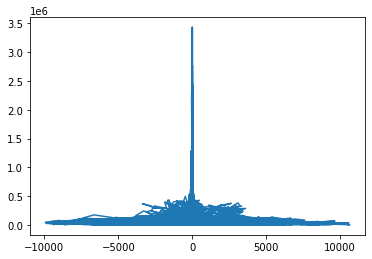

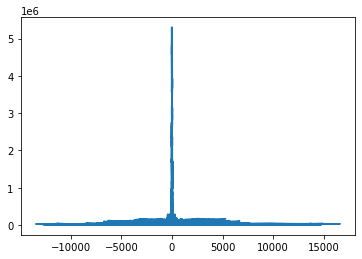

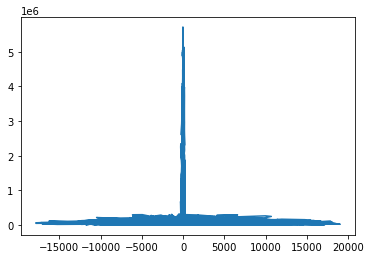

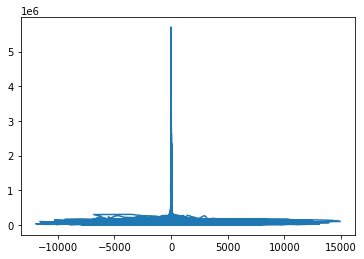

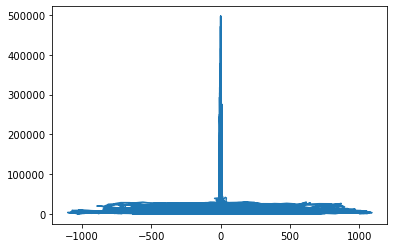

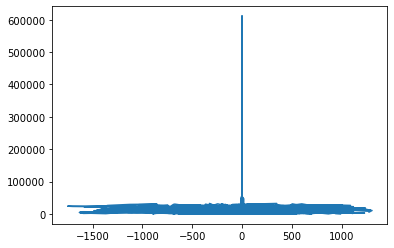

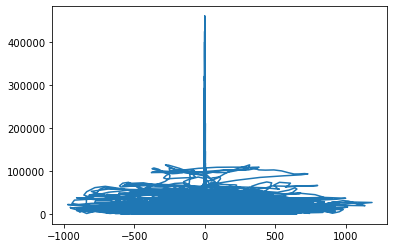

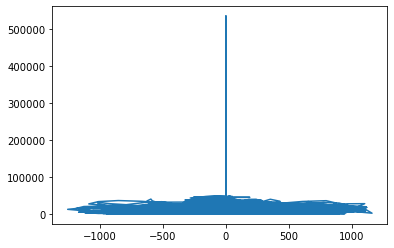

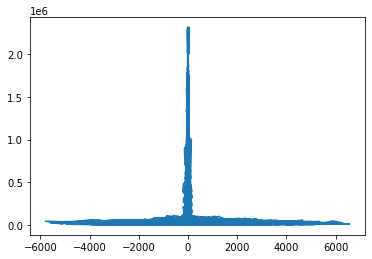

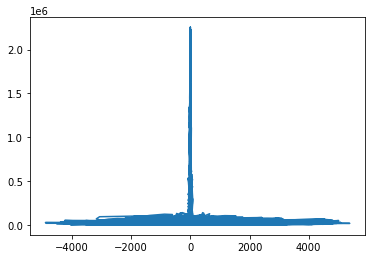

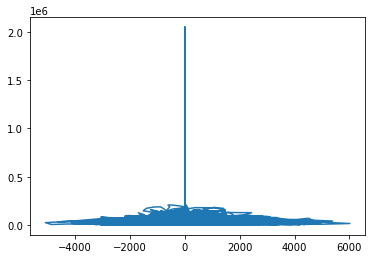

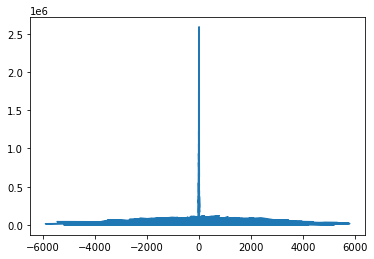

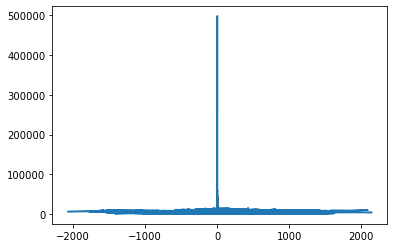

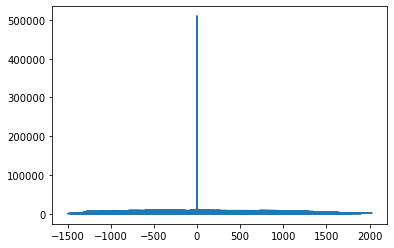

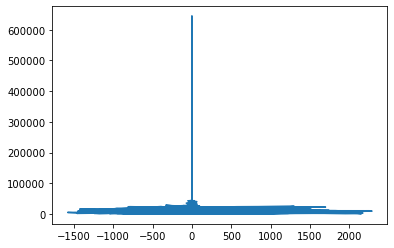

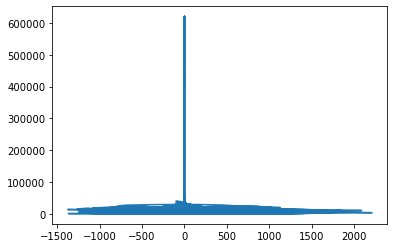

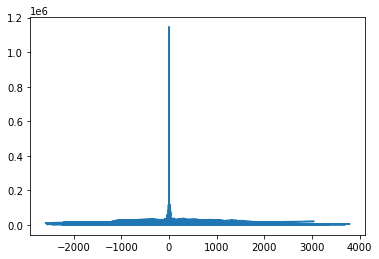

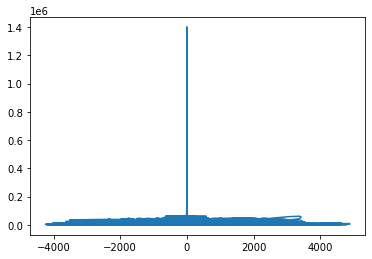

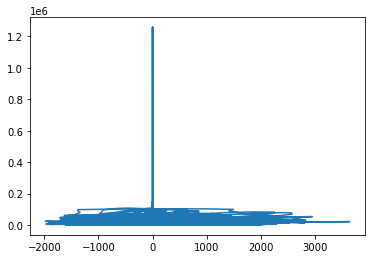

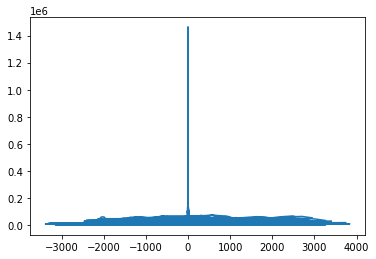

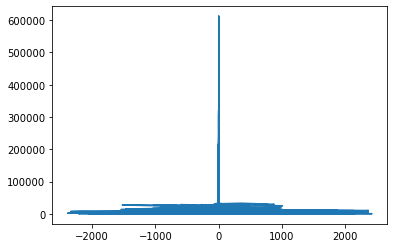

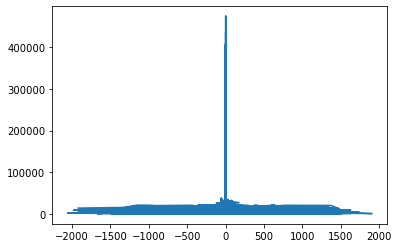

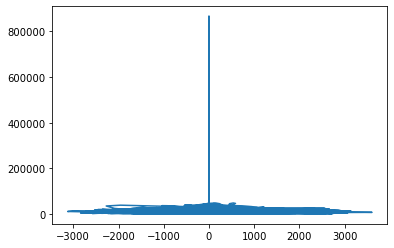

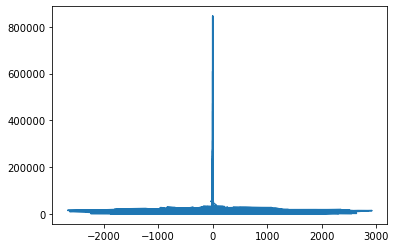

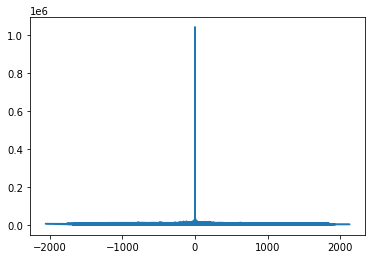

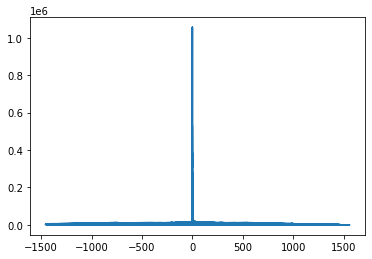

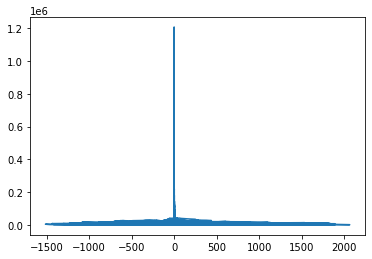

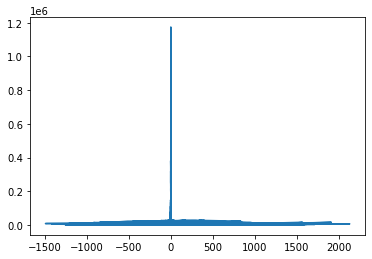

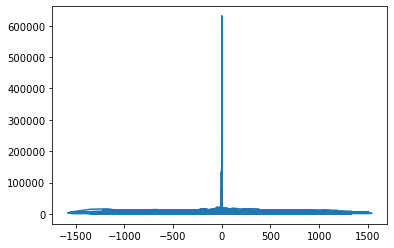

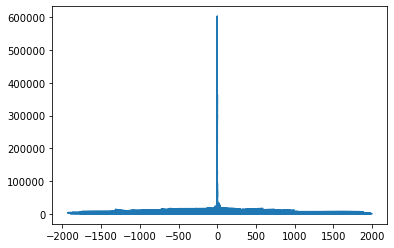

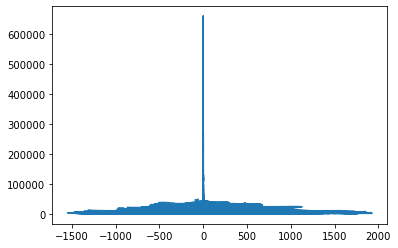

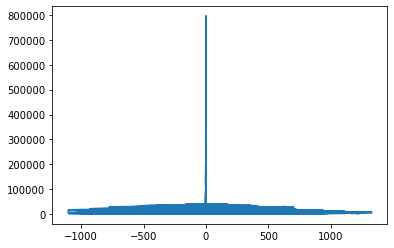

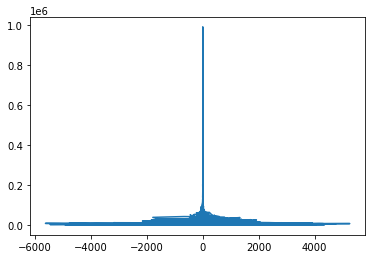

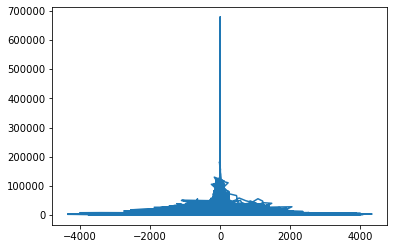

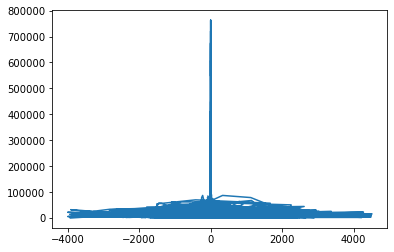

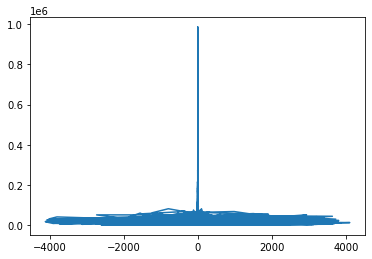

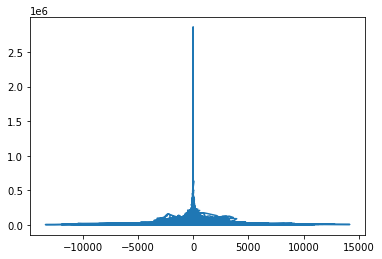

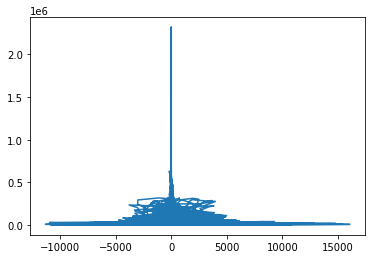

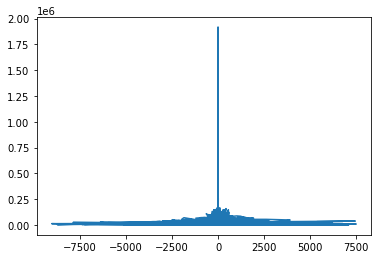

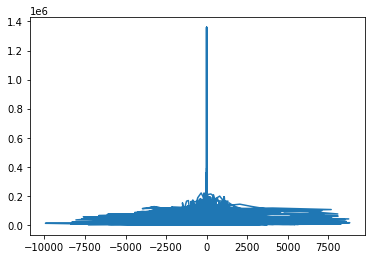

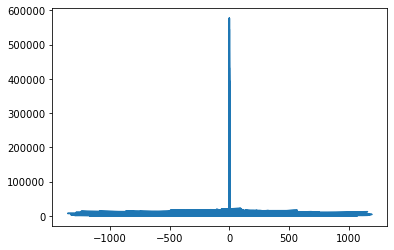

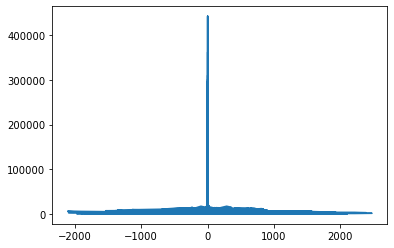

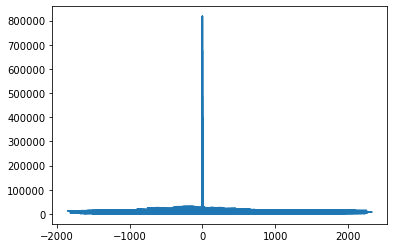

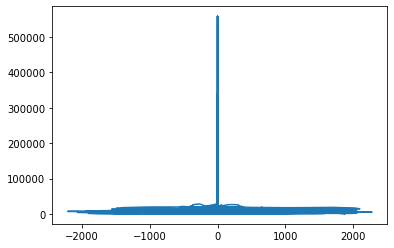

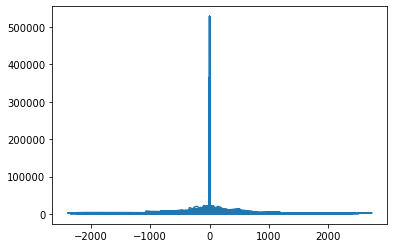

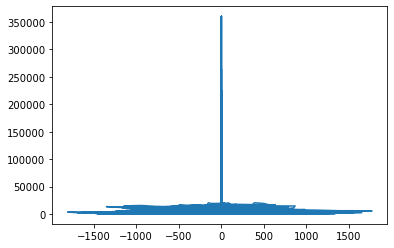

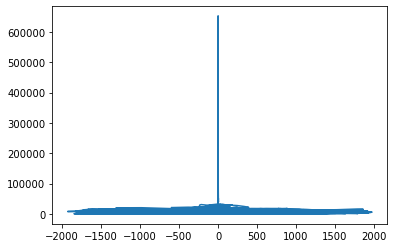

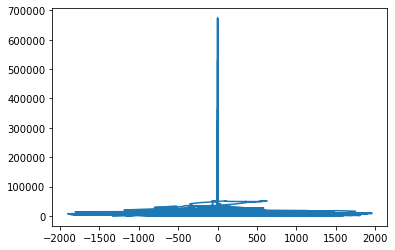

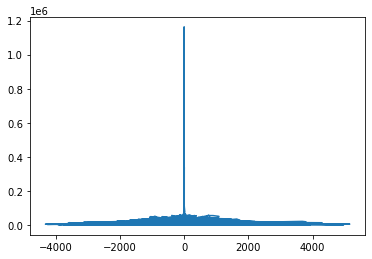

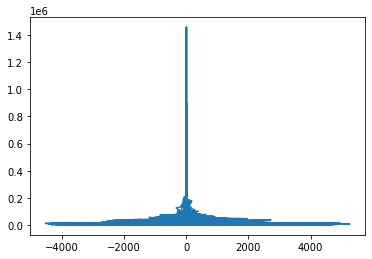

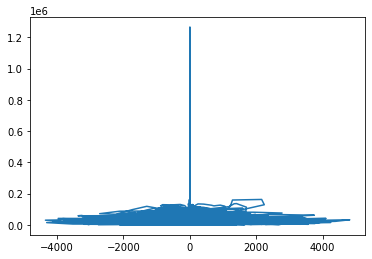

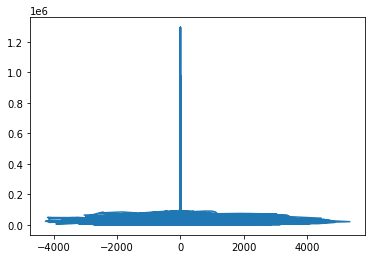

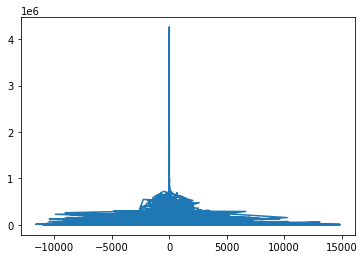

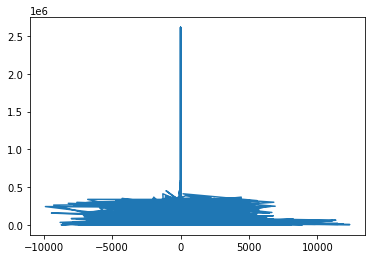

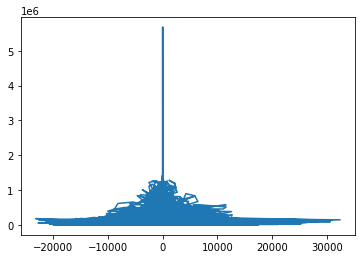

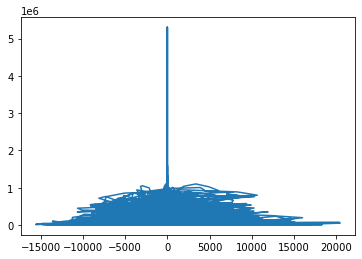

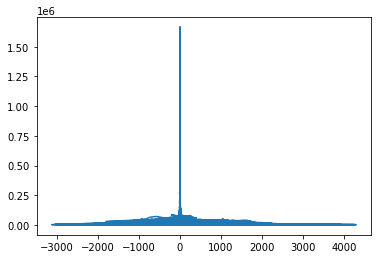

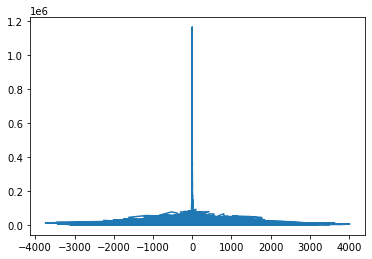

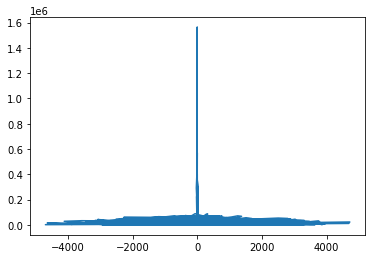

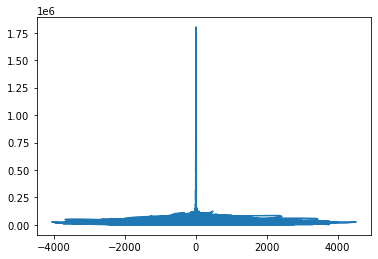

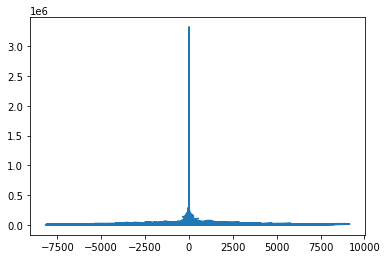

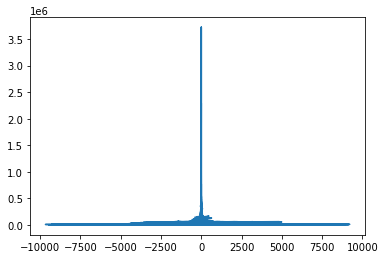

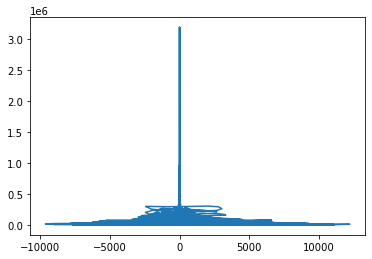

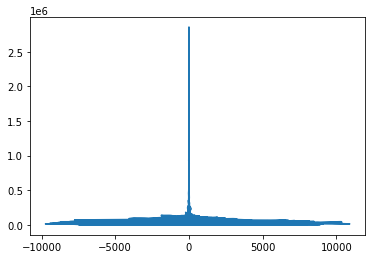

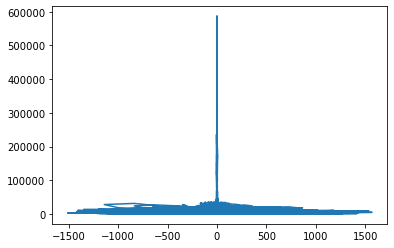

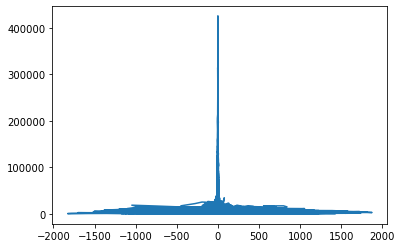

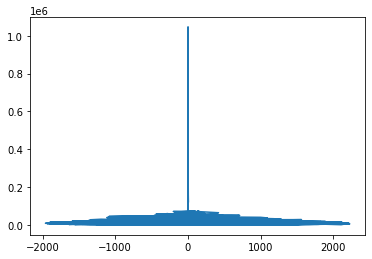

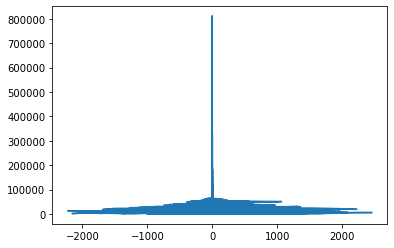

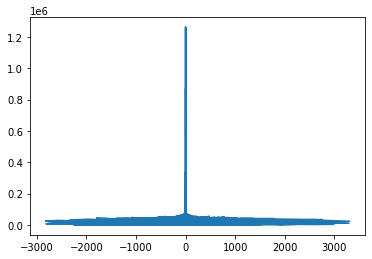

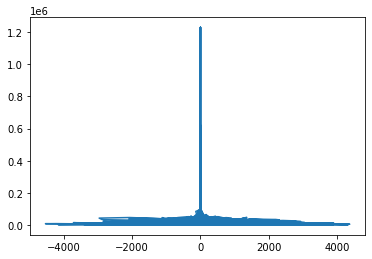

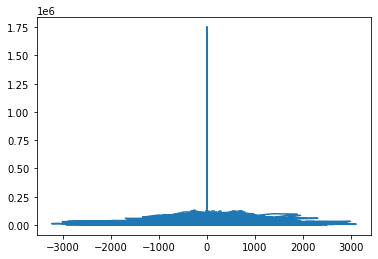

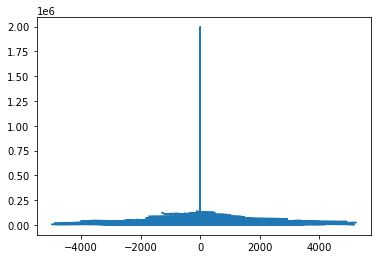

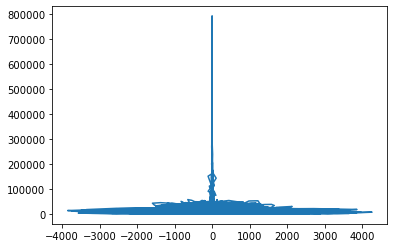

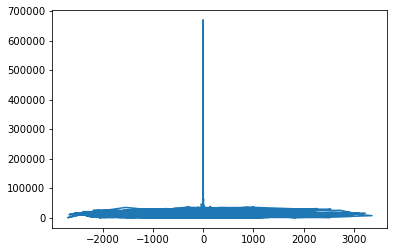

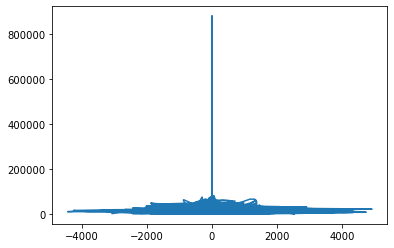

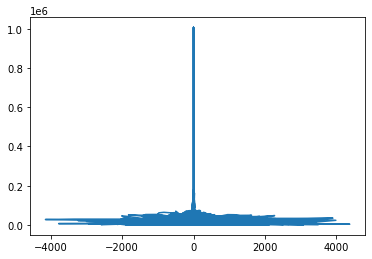

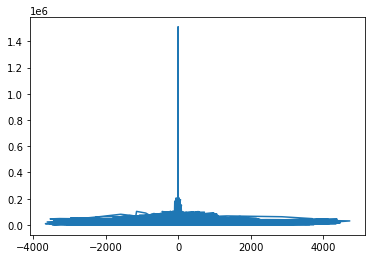

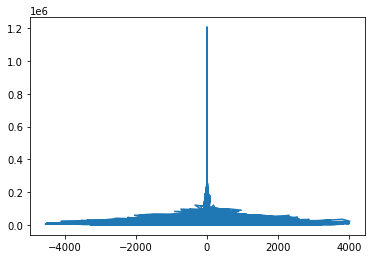

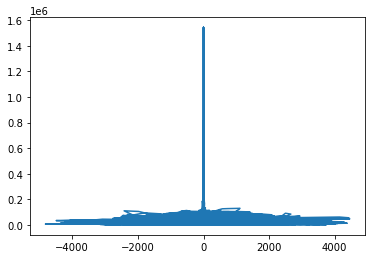

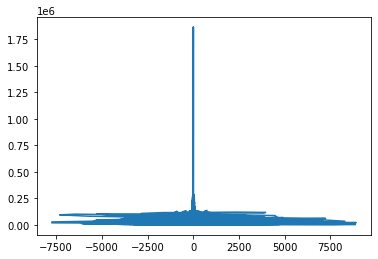

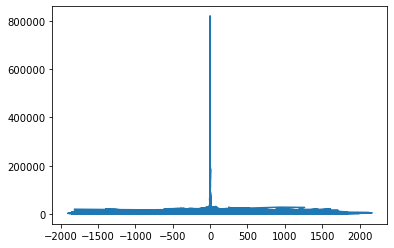

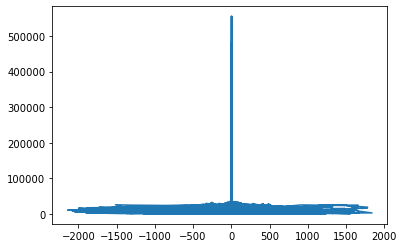

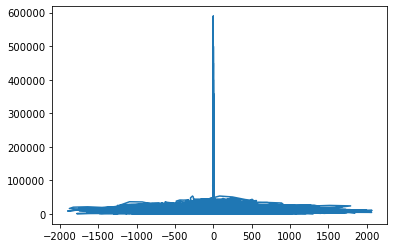

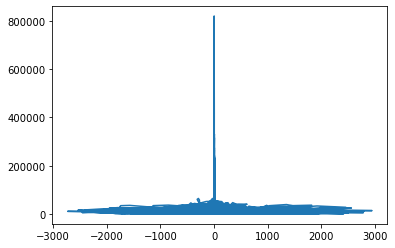

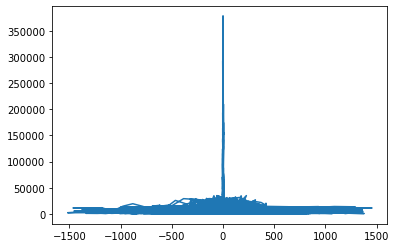

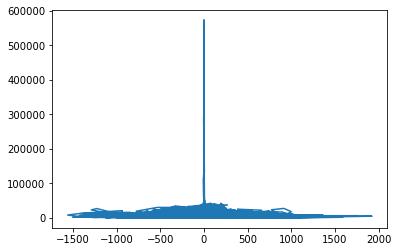

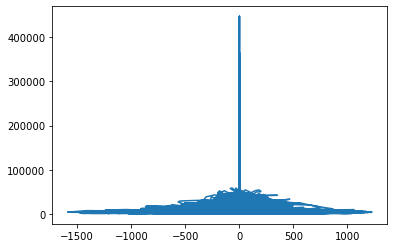

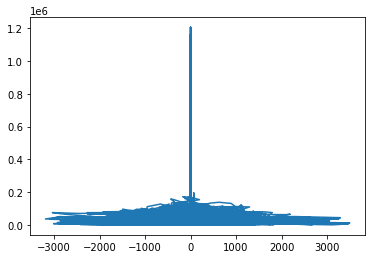

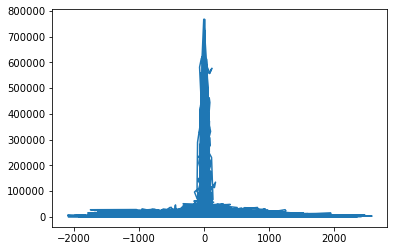

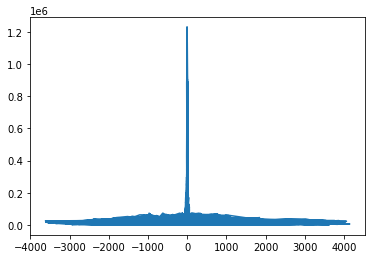

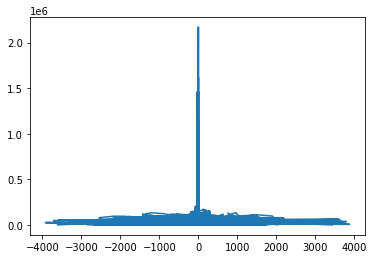

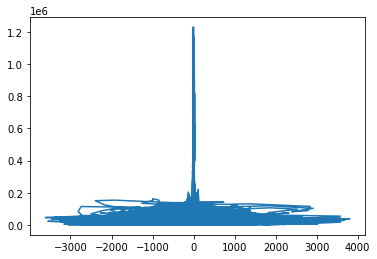

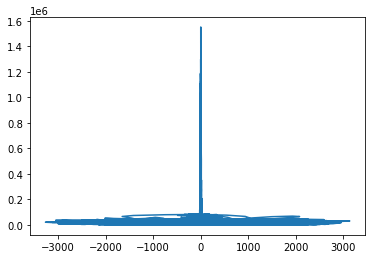

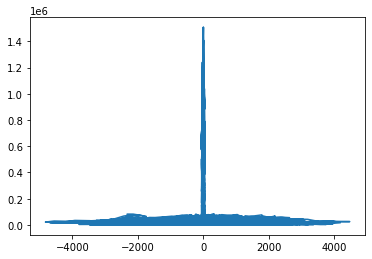

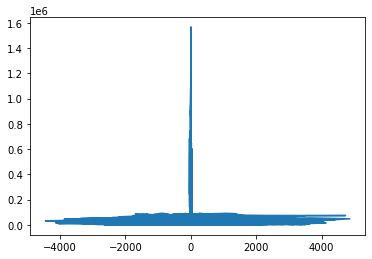

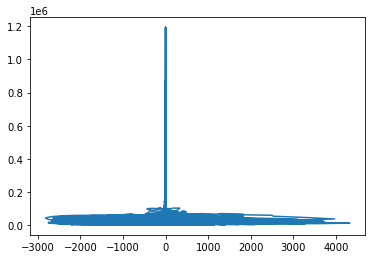

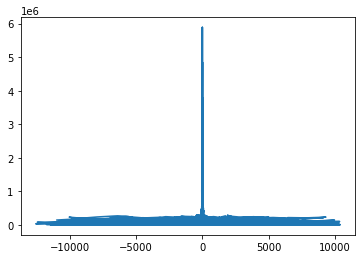

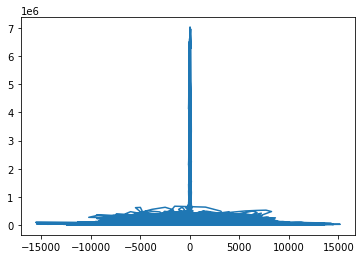

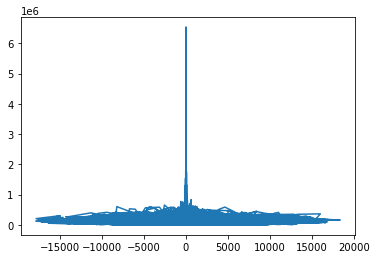

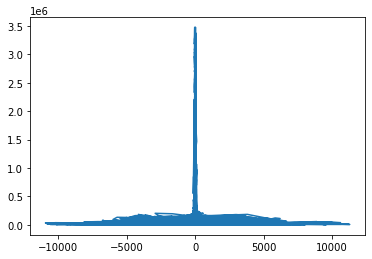

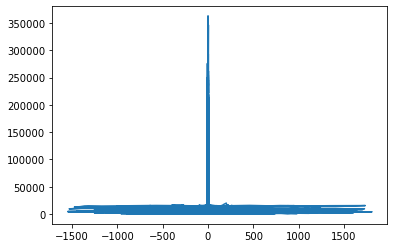

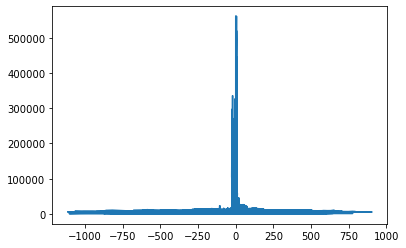

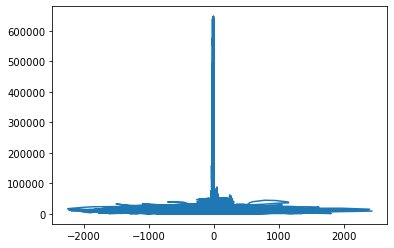

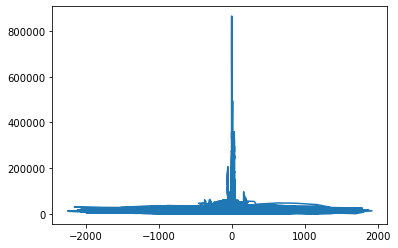

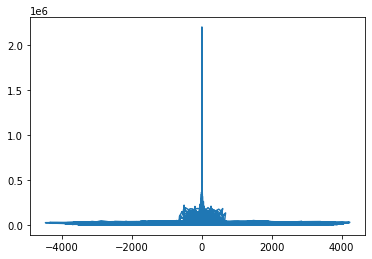

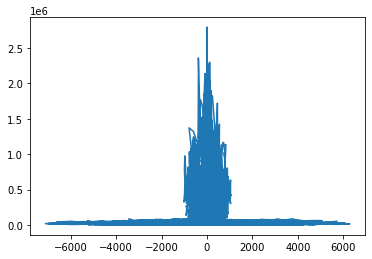

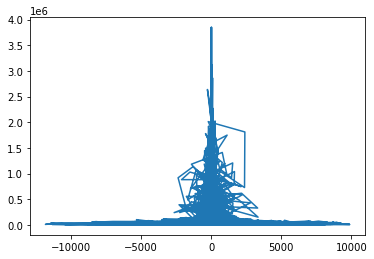

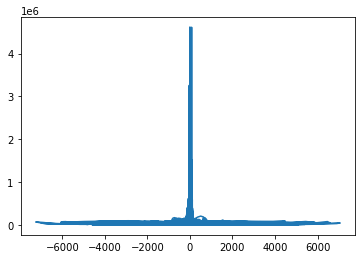

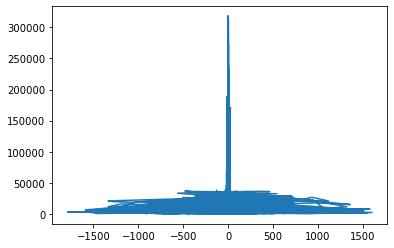

KeyboardInterrupt: 

In [36]:
# Here The Data Set is loaded and plots are Visualised by Calling the Plotting Functions . 
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile as wav

from scipy.fftpack import fft
import numpy as np

os.listdir(path=f'{BASE_DIR}/speech-emotion-recognition-ravdess-data')
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = f'{BASE_DIR}/speech-emotion-recognition-ravdess-data'
listOfFiles = getListOfFiles(dirName)
for file in range(0 , len(listOfFiles) , 1):
    rate, data = wav.read(listOfFiles[file])
    fft_out = fft(data)
    %matplotlib inline
    plt.plot(data, np.abs(fft_out))
    plt.show()
    
signals={}
fft={}
fbank={}
mfccs={}
# load data
for file in range(0 , len(listOfFiles) , 1):
#     rate, data = wavfile.read(listOfFiles[file])
     signal,rate =librosa.load(listOfFiles[file] , sr=44100)
     mask = envelope(signal , rate , 0.0005)
     signals[file] = signal
     fft[file] = calc_fft(signal , rate)
    
     bank = logfbank(signal[:rate] , rate , nfilt = 26, nfft = 1103).T
     fbank[file] = bank
     mel = mfcc(signal[:rate] , rate , numcep =13 , nfilt = 26 , nfft=1103).T
     mfccs[file]=mel

plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

In [12]:
#Now Cleaning Step is Performed where:
#DOWN SAMPLING OF AUDIO FILES IS DONE  AND PUT MASK OVER IT AND DIRECT INTO CLEAN FOLDER
#MASK IS TO REMOVE UNNECESSARY EMPTY VOIVES AROUND THE MAIN AUDIO VOICE 
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [15]:
#The clean Audio Files are redirected to Clean Audio Folder Directory 
import glob,pickle
from tqdm import tqdm
import librosa as lr
import pandas as pd
from scipy.io import wavfile
for file in tqdm(glob.glob(f'{BASE_DIR}/speech-emotion-recognition-ravdess-data/**/*.wav')):
    file_name = os.path.basename(file)
    signal , rate = lr.load(file, sr=16000)
    mask = envelope(signal,rate, 0.0005)
    wavfile.write(filename= f'{BASE_DIR}/clean_speech/'+str(file_name), rate=rate,data=signal[mask])

100%|█████████████████████████████████████████████████████████████████████████████████████| 1439/1439 [00:19<00:00, 72.74it/s]


In [16]:
# Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

In [17]:
#Emotions in the RAVDESS dataset to be classified Audio Files based on . 
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#These are the emotions User wants to observe more :
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [22]:
#Load the data and extract features for each sound file
from glob import glob
import os
def load_data(test_size=0.33):
    x,y=[],[]
    answer = 0
    for file in glob.glob(f"{BASE_DIR}/speech-emotion-recognition-ravdess-data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("_")[2]]
        if emotion not in observed_emotions:
            answer += 1
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append([emotion,file_name])

    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)



In [23]:
#Split the dataset
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import soundfile
import glob
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)
#x_train,x_test,y_trai,y_tes=train_test_split(load_data(test_size=0.25),test_size=0.25,random_state=0)
print(np.shape(x_train),np.shape(x_test), np.shape(y_train),np.shape(y_test))
y_test_map = np.array(y_test).T
y_test = y_test_map[0]
test_filename = y_test_map[1]
y_train_map = np.array(y_train).T
y_train = y_train_map[0]
train_filename = y_train_map[1]
print(np.shape(y_train),np.shape(y_test))
print(*test_filename,sep="\n")

IndexError: list index out of range

In [24]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))
print((x_train[0], x_test[0]))
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

NameError: name 'x_train' is not defined

In [25]:

# Initialize the Multi Layer Perceptron Classifier
#Initialize the Multi Layer Perceptron Classifier
#model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [104]:
#Train the model

model.fit(x_train,y_train)

TypeError: Singleton array array('disgust', dtype='<U7') cannot be considered a valid collection.

In [26]:

#SAVING THE MODEL
import pickle
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
# Save the Modle to file in the current working directory
#For any new testing data other than the data in dataset

Pkl_Filename = "Emotion_Voice_Detection_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [27]:
# Load the Model back from file 
with open(Pkl_Filename, 'rb') as file:
    Emotion_Voice_Detection_Model = pickle.load(file)


In [103]:
#predicting :
#x_test=train_test_split(test_size=0.25)
#y_pred=Emotion_Voice_Detection_Model.predict(x_test)
#Predict for the test set
y_pred=model.predict(x_test)

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [98]:
#Store the Prediction probabilities into CSV file 
import numpy as np
import pandas as pd
import glob
from sklearn.model_selection import train_test_split
x_test=load_data(test_size=0.25)
y_pred=Emotion_Voice_Detection_Model.predict(x_test)
y_pred1 = pd.DataFrame(y_pred, columns=['predictions'])
y_pred1['file_names'] = test_filename
print(y_pred1)
y_pred1.to_csv(f'{BASE_DIR}/predictionfinal.csv')

NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [91]:
#RECORDED USING MICROPHONE:
import pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 1
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output10.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


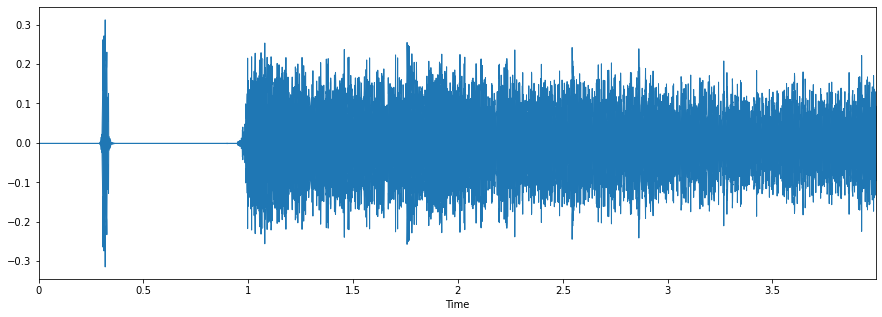

In [92]:
#The file 'output10.wav' in the next cell is the file that was recorded live using the code :
data, sampling_rate = librosa.load('output10.wav')
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import librosa.display
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [122]:
## Appying extract_feature function on random file and then loading model to predict the result 

file = 'output10.wav'
# data , sr = librosa.load(file)
# data = np.array(data)

ans =[]
new_feature = extract_feature(file, mfcc=True, chroma=True, mel=True)
ans.append(new_feature)
ans = np.array(ans)
# data.shape

Emotion_Voice_Detection_Model.predict([ans])



NotFittedError: This MLPClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.